In [35]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"hanw001","key":"5f5bfbf4e7a9a64e412146c486992d55"}'}

In [36]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Permission Warning 이 일어나지 않도록 
!chmod 600 ~/.kaggle/kaggle.json

In [37]:
!kaggle datasets download -d uciml/autompg-dataset # sub item button 누르고 copy API command

autompg-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [38]:
!kaggle competitions download -c porto-seguro-safe-driver-prediction

test.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [39]:
path_to_zip_file = '/content/train.csv.zip'
directory_to_extract_to = '/content/train.csv'

import zipfile
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
     zip_ref.extractall(directory_to_extract_to)

In [40]:
path_to_zip_file = '/content/test.csv.zip'
directory_to_extract_to = '/content/test.csv'

import zipfile
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

## 4.2 경진대회 주최자의 동기

정확한 안전 운전자 예측 모델을 통하여 자사 고객에게 합리적인 보험금을 청구하고자 노력한다.

## 4.3 평가 척도

[정규화 지니 계수]

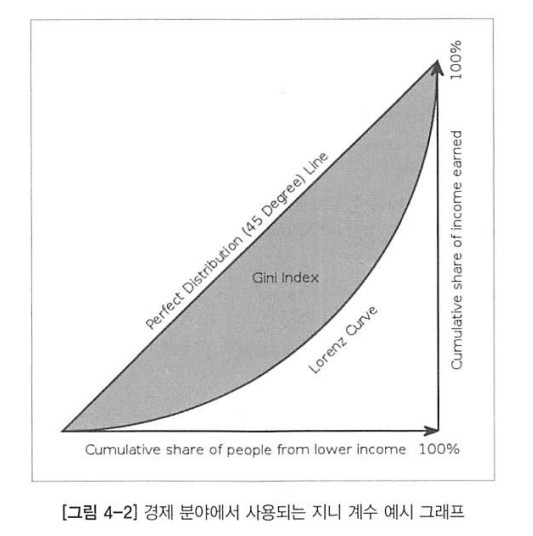

In [41]:
#Prediction
predictions = [0.9,0.3,0.8,0.75,0.65,0.6,0.78,0.7,0.05,0.4,0.4,0.05,0.5,0.1,0.1]
#Actual
actual = [1,1,1,1,1,1,0,0,0,0,0,0,0,0,0]

In [42]:
import numpy as np

all = np.asarray(np.c_[actual, predictions, np.arange(len(actual))], dtype = np.float)
all = all[np.lexsort((all[:, 2], -1*all[:,1]))]
all

array([[ 1.  ,  0.9 ,  0.  ],
       [ 1.  ,  0.8 ,  2.  ],
       [ 0.  ,  0.78,  6.  ],
       [ 1.  ,  0.75,  3.  ],
       [ 0.  ,  0.7 ,  7.  ],
       [ 1.  ,  0.65,  4.  ],
       [ 1.  ,  0.6 ,  5.  ],
       [ 0.  ,  0.5 , 12.  ],
       [ 0.  ,  0.4 ,  9.  ],
       [ 0.  ,  0.4 , 10.  ],
       [ 1.  ,  0.3 ,  1.  ],
       [ 0.  ,  0.1 , 13.  ],
       [ 0.  ,  0.1 , 14.  ],
       [ 0.  ,  0.05,  8.  ],
       [ 0.  ,  0.05, 11.  ]])

In [43]:
import numpy as np

all = np.asarray(np.c_[actual, predictions, np.arange(len(actual))], dtype = np.float)
all = all[np.lexsort((all[:, 2], -1*all[:,1]))]
totalLosses = all[:,0].sum()
giniSum = all[:, 0].cumsum().sum() #/ totalLosses
# totalLosses
giniSum

65.0

In [44]:
# 4-1 지니 계수를 계산하는 파이썬 함수

def gini(actual, pred):
  assert (len(actual) == len(pred))
  all = np.asarray(np.c_[actual, pred, np.arange(len(actual))], dtype = np.float)
  all = all[np.lexsort((all[:, 2], -1*all[:,1]))]
  totalLosses = all[:,0].sum()
  giniSum = all[:, 0].cumsum().sum() / totalLosses
  giniSum -= (len(actual)+1) /2.
  return giniSum/len(actual)

def gini_nomalized(actual, pred):
  return gini(actual, pred) / gini(actual, actual)

In [45]:
# 4-2 지니 계수 정답값
import numpy as np

gini_predictions = gini(actual, predictions)
gini_max = gini(actual, actual)
ngini = gini_nomalized(actual, predictions)

print('Gini: %.3f, Max. , Gini: %.3f, Nomalized Gini: %.3f' %(gini_predictions, gini_max, ngini))

Gini: 0.189, Max. , Gini: 0.300, Nomalized Gini: 0.630


In [46]:
# 4-3 정답값을 예측값의 오름차순으로 정렬하는 코드

data = zip(actual, predictions)
sorted_data = sorted(data, key=lambda d: d[1])
sorted_actual = [d[0] for d in sorted_data]
print('Sorted Actual Values', sorted_actual)

Sorted Actual Values [0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1]


정렬된 정답값의 누적 합을 그래프로 표시하면 그림을 얻는다. 로렌츠 곡선에 해당한다.

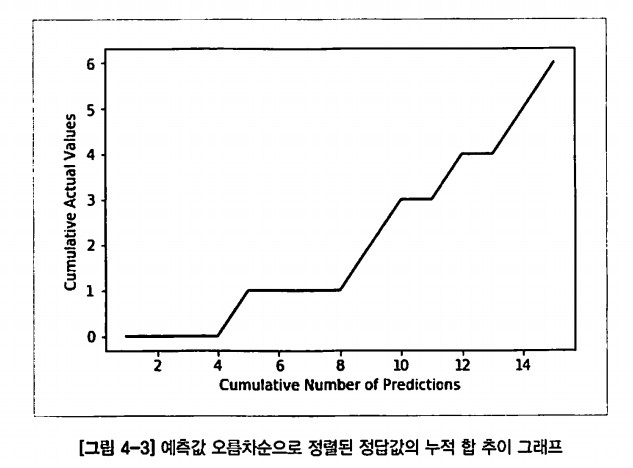

그래프의 X,Y축을 정규화한 후, 삼각형을 그린후 색칠한다.

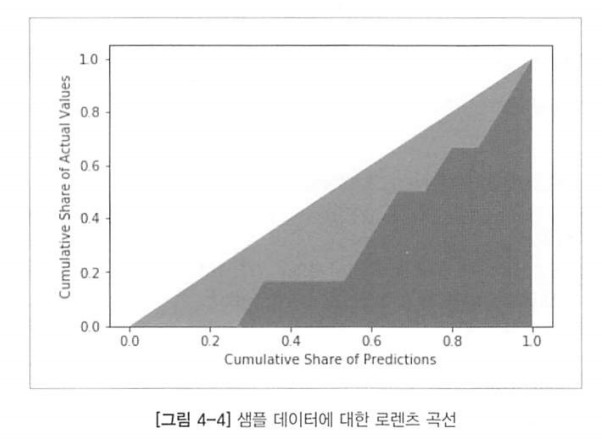

예측모델 100%

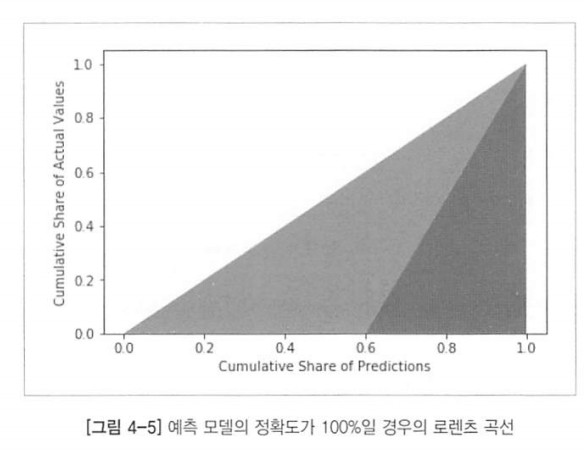

이번 경진대회는 운전자 A가 내년에 보험을 청구할 확률을 예측하는 경연이다.

## 4.4 중요접근

### 데이터

   

*   익명이라 변수가 무엇을 의미하는지 알수없고 관계또한 알수 없다.
*   값의 높낮이도모른다.

*   탐색적 데이터 분석 과정을 통해 각 변수와 데이터의 분포를 분석한다.
*   훈련과 테스트 데이터 분포를 비교해 효과적인 내부교차검증 프로세스를 구축하는데 참조한다.





### 피처 엔지니어링



*   파생 변수 생성과 선별과정은 철저히 실험 기반으로 수행한다. 변인을 줄인 상태에서 다양한 수행을 해서 좋은것만 채택한다.


### 모델



*   LightGBM을 사용한다.





### 앙상블



*   케라스 기반의 인공 신경망 모델을 추가로 학습한다.



## 4.6 탐색적 데이터 분석

### 기초 통계로 데이터 살펴보기

In [47]:
import pandas as pd
import numpy as np

trn = pd.read_csv('/content/train.csv/train.csv', na_values=['-1', '-1.0'])
tst = pd.read_csv('/content/test.csv/test.csv', na_values=['-1', '-1.0'])

print(trn.shape, tst.shape)

(595212, 59) (892816, 58)


In [48]:
trn.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2.0,5,1.0,0.0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10.0,1.0,NaN,0,1.0,4,1.0,0,0.0,1,12,2.0,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1.0,7,0.0,0.0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11.0,1.0,NaN,0,NaN,11,1.0,1,2.0,1,19,3.0,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4.0,9,1.0,0.0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,NaN,7.0,1.0,NaN,0,NaN,14,1.0,1,2.0,1,60,1.0,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1.0,2,0.0,0.0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7.0,1.0,0.0,0,1.0,11,1.0,1,3.0,1,104,1.0,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2.0,0,1.0,0.0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11.0,1.0,NaN,0,NaN,14,1.0,1,2.0,1,82,3.0,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [49]:
trn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   594996 non-null  float64
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595129 non-null  float64
 6   ps_ind_05_cat   589403 non-null  float64
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

bin으로 끝난 것은 이진변수고, cat으로 끝난 변수는 범주형 변수다. -1은 결측값을 의미한다.

In [50]:
np.unique(trn['target'])

array([0, 1])

In [51]:
1.0*sum(trn['target'])/trn.shape[0]

0.036447517859182946

타겟 변수의 고유값은 보험청구를 나타내는 이진변수고 전체 데이터중 3.6%가 보험청구됫다.

### 시각화로 데이터 살펴보기

In [52]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
# 분석의 편의를 위해 변수 유형별로 구분한다
# 이진 변수
binary = ['ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
          'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_calc_15_bin', 
          'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin']
# 범주형 변수
category = ['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 
            'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 
            'ps_car_10_cat', 'ps_car_11_cat']
# 정수형 변수
integer = ['ps_ind_01', 'ps_ind_03', 'ps_ind_14', 'ps_ind_15', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06', 
           'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 
           'ps_calc_14', 'ps_car_11']
# 소수형 변수
floats = ['ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_car_12', 'ps_car_13',
          'ps_car_14', 'ps_car_15']

### 단일 변수 히스토그램

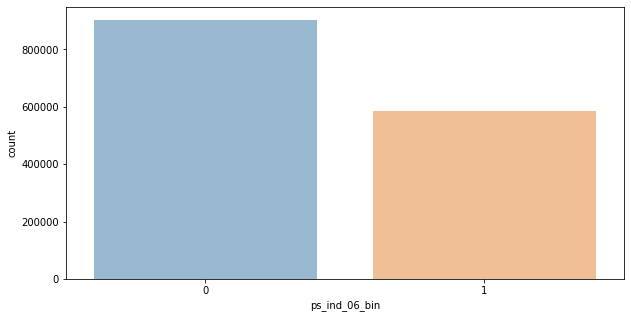

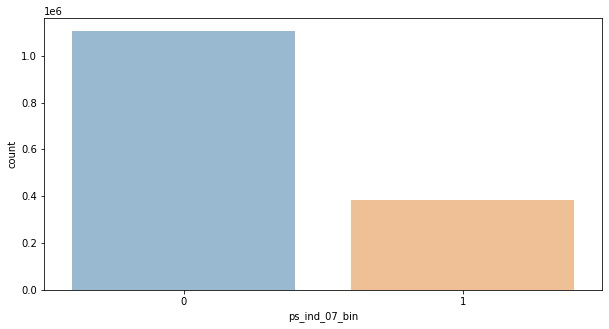

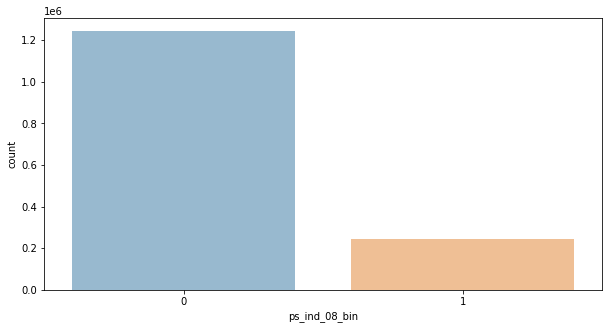

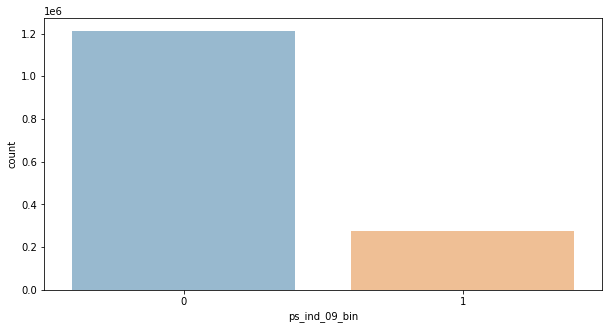

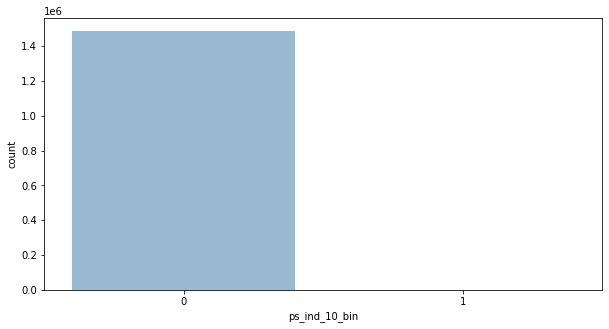

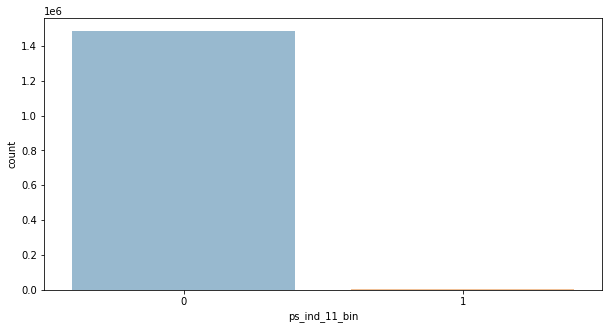

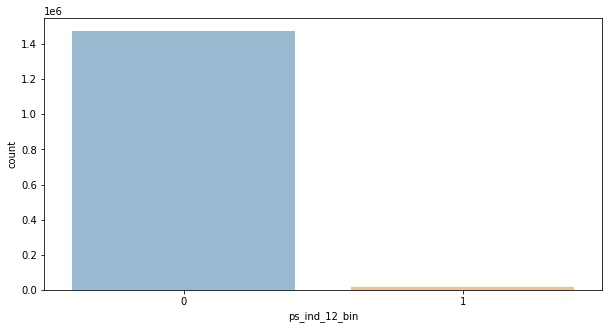

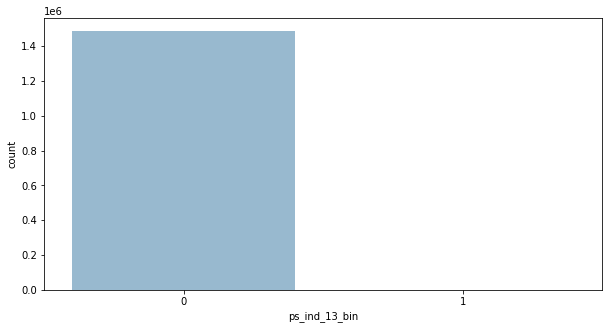

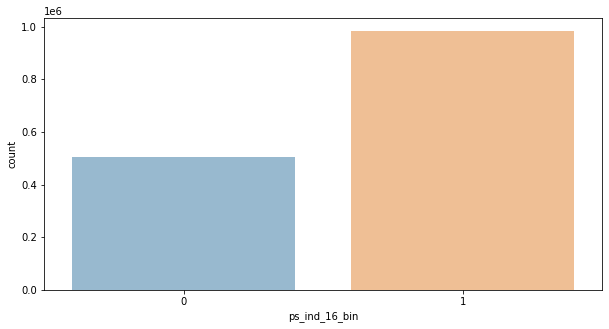

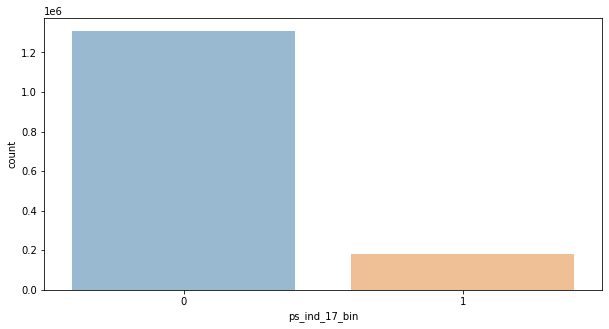

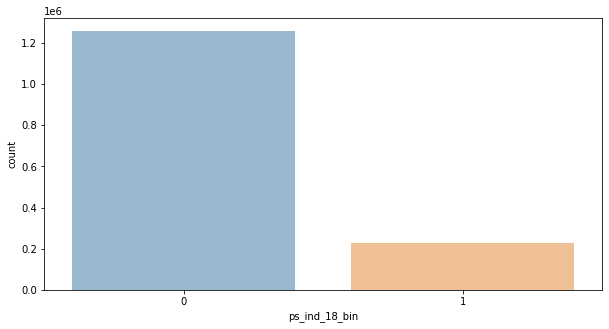

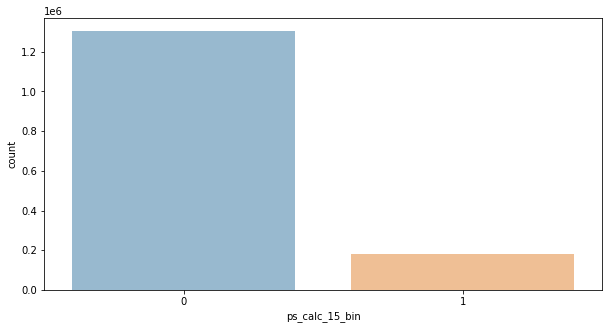

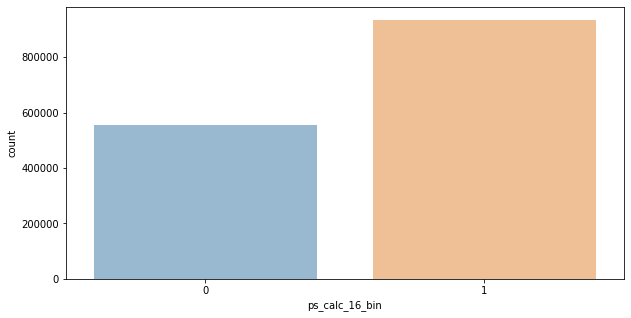

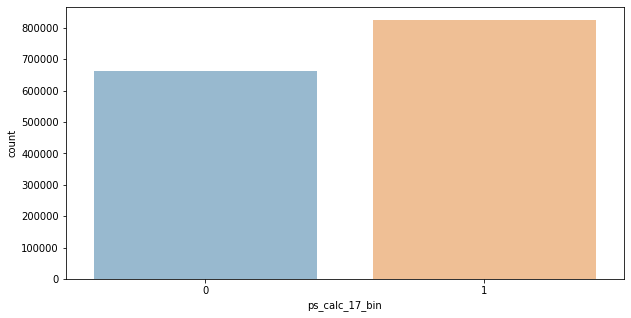

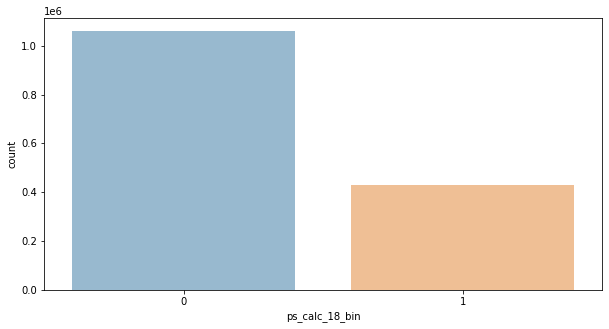

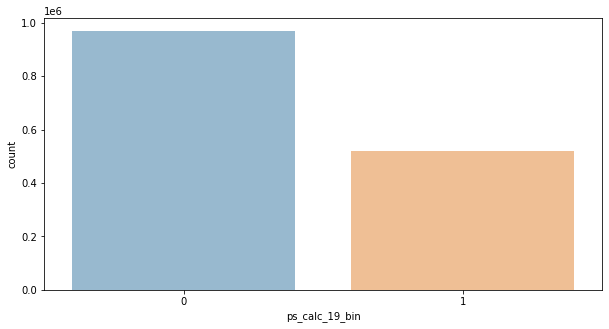

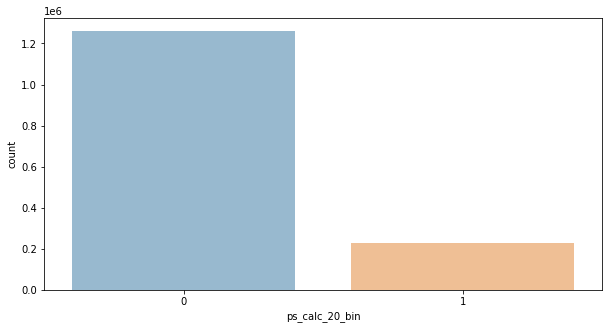

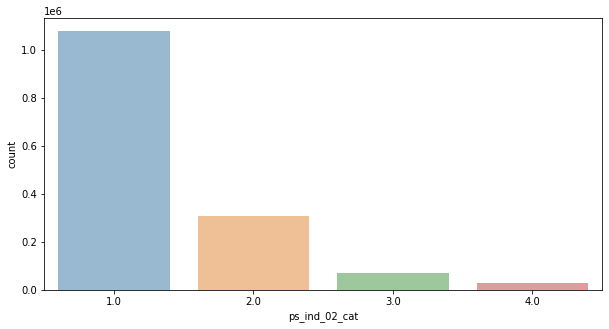

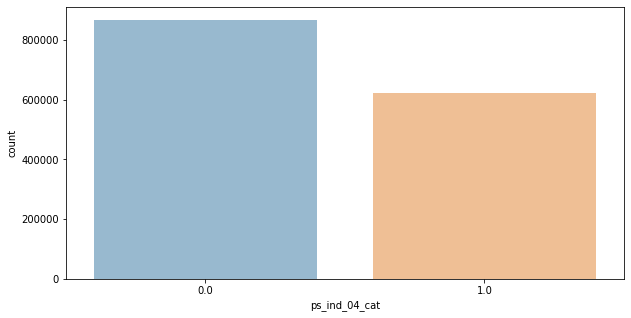

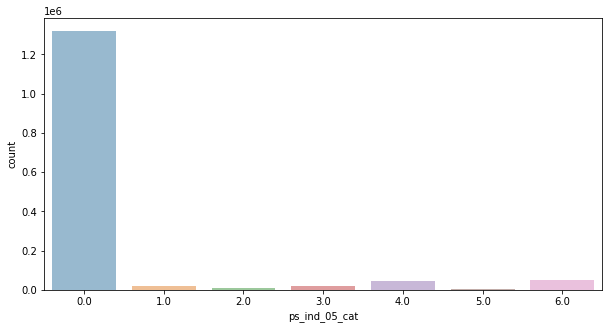

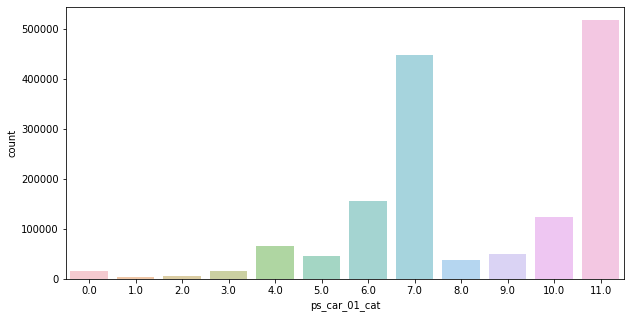

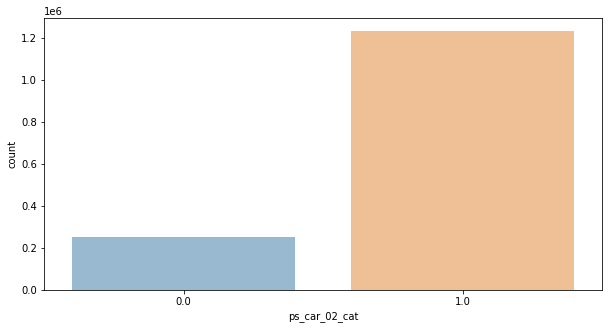

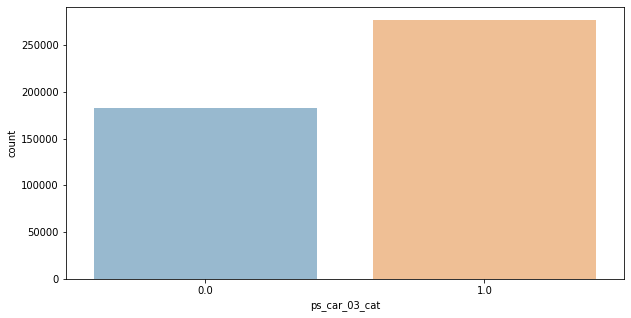

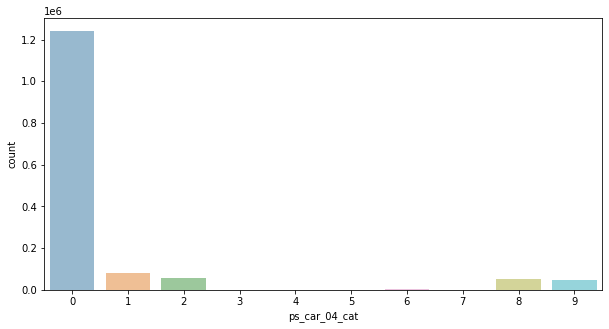

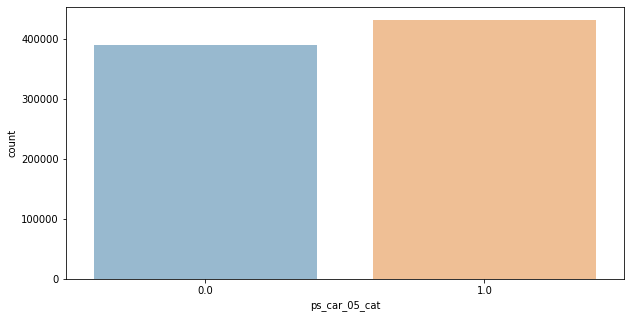

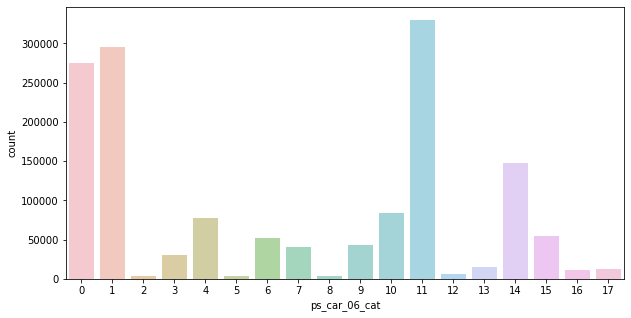

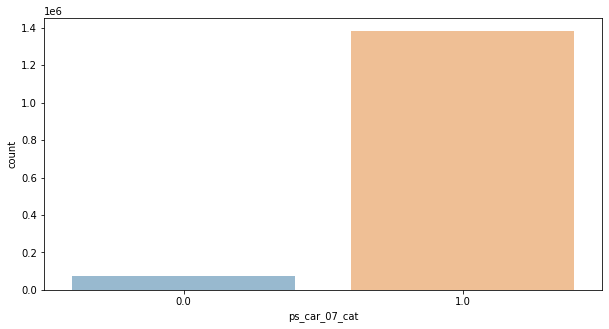

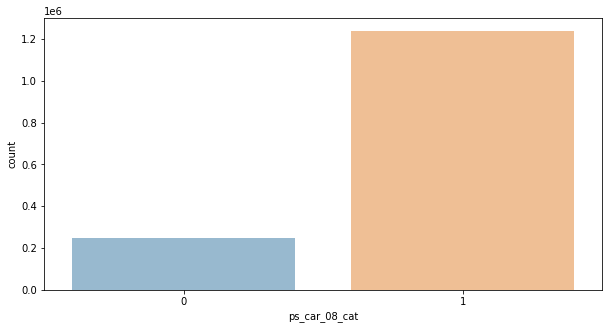

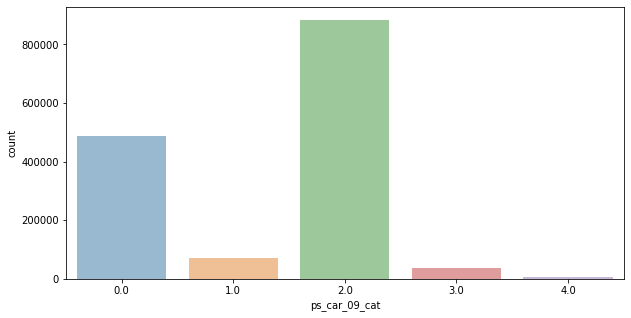

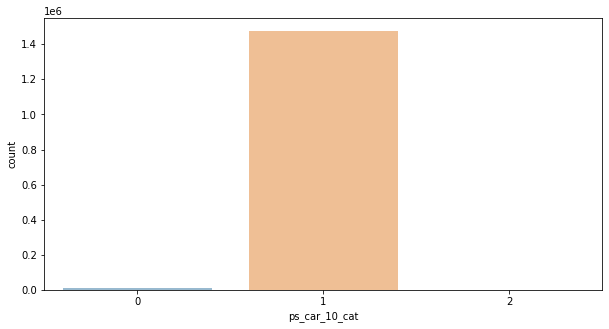

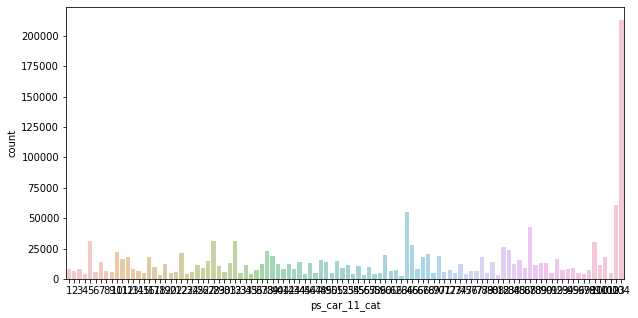

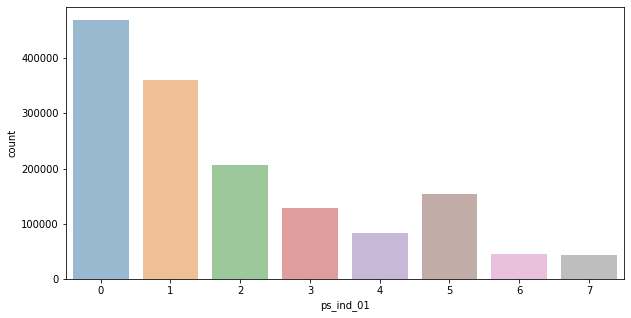

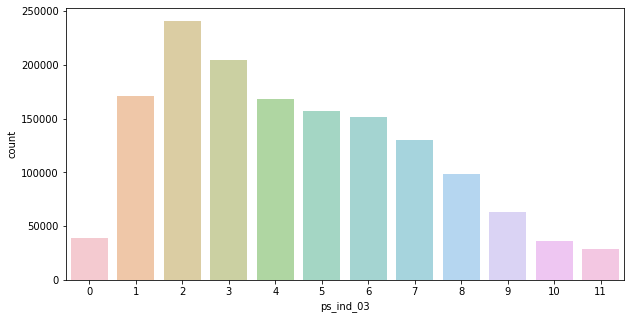

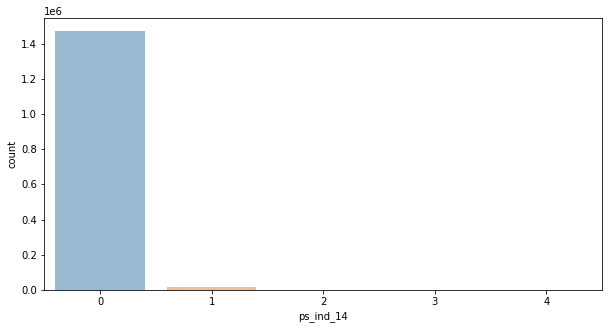

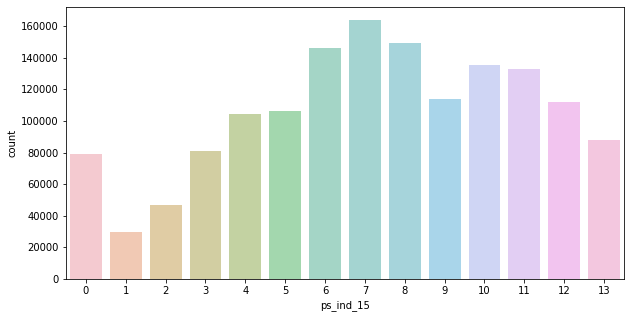

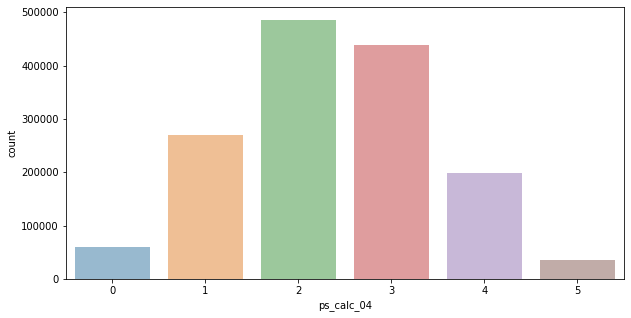

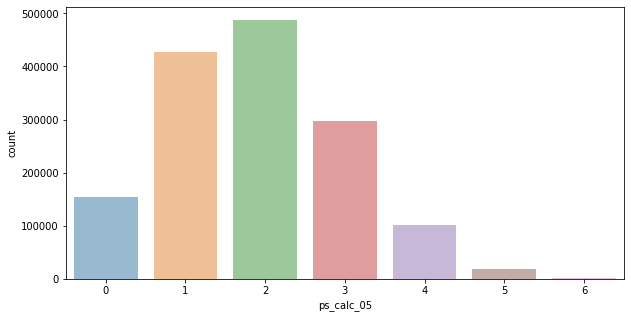

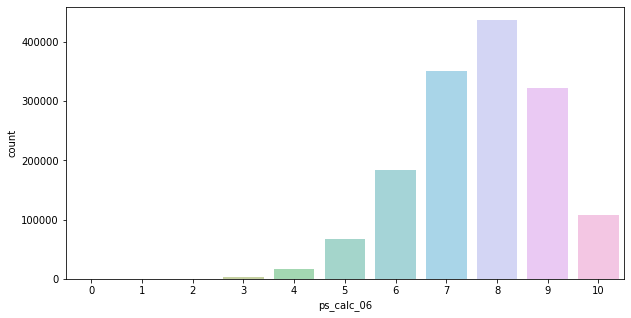

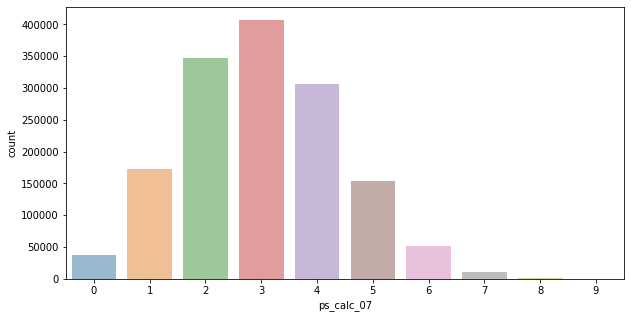

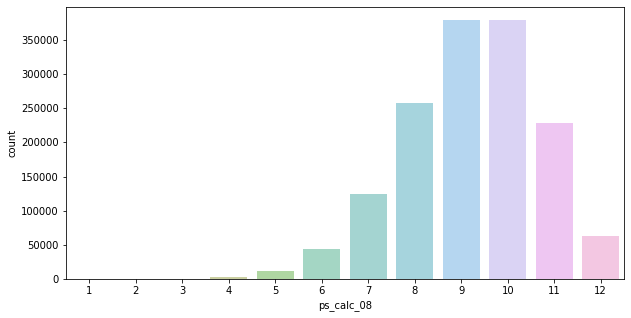

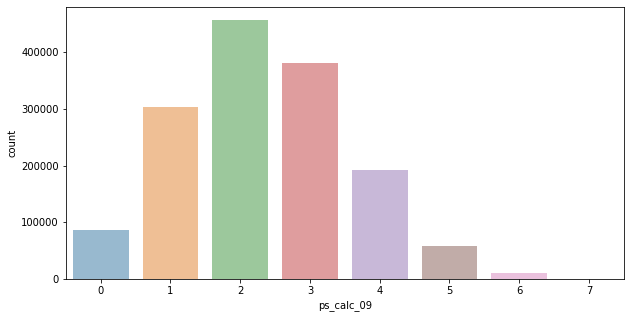

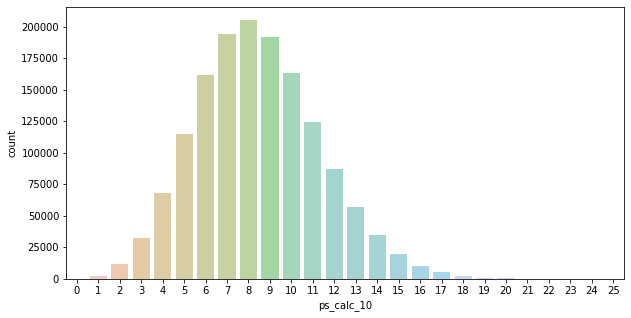

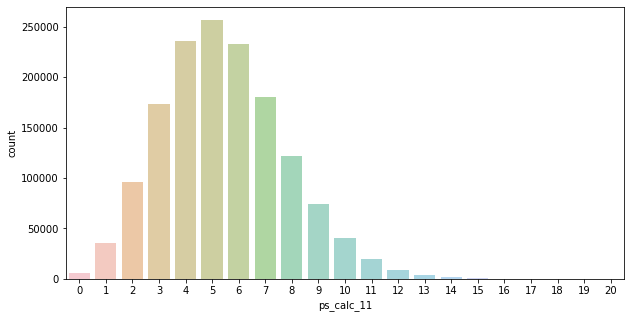

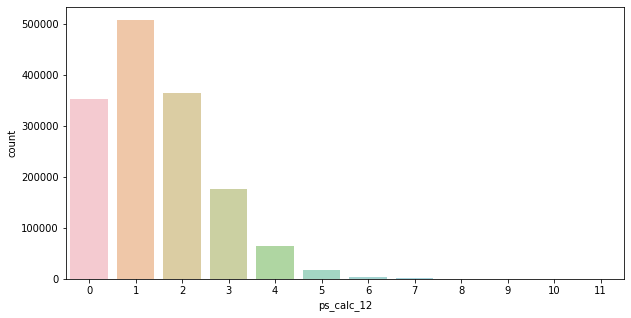

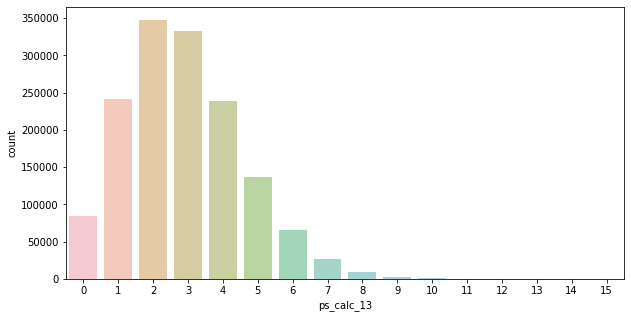

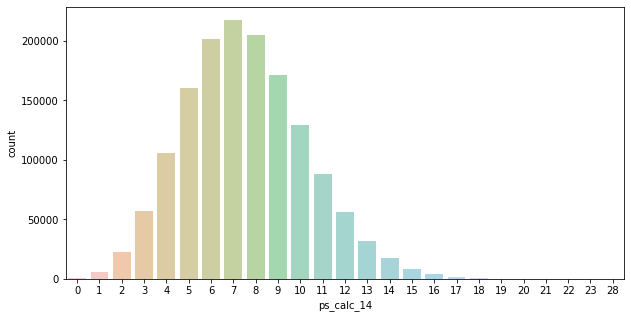

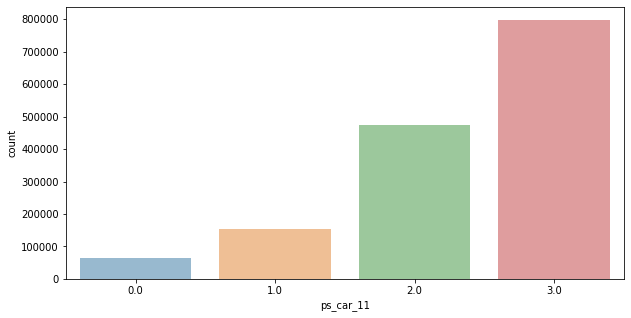

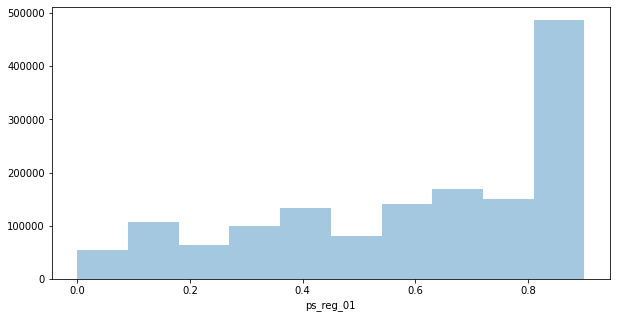

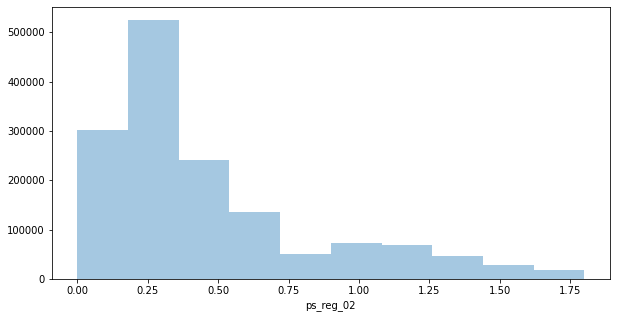

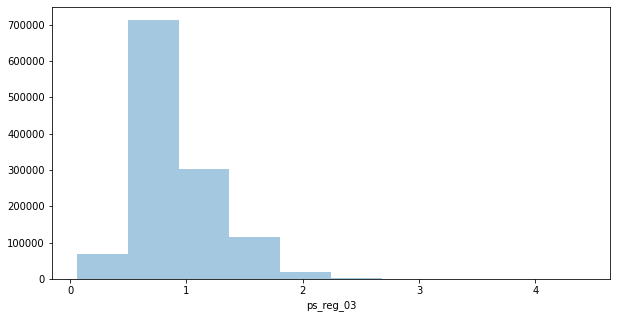

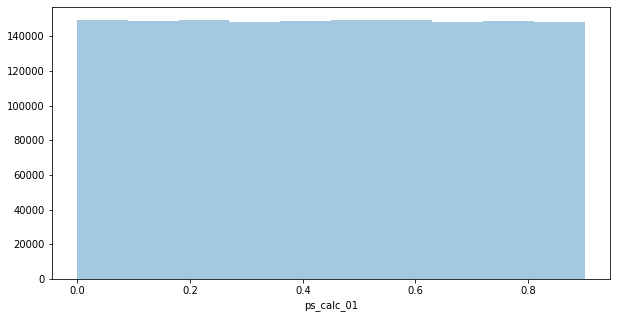

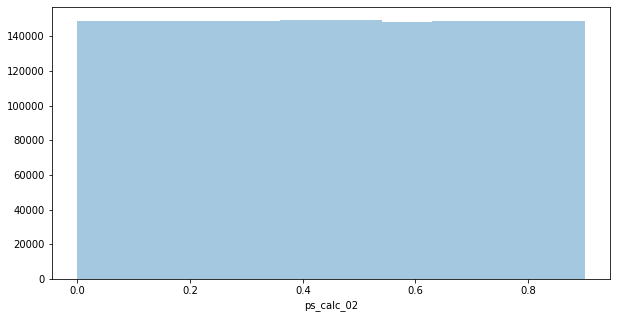

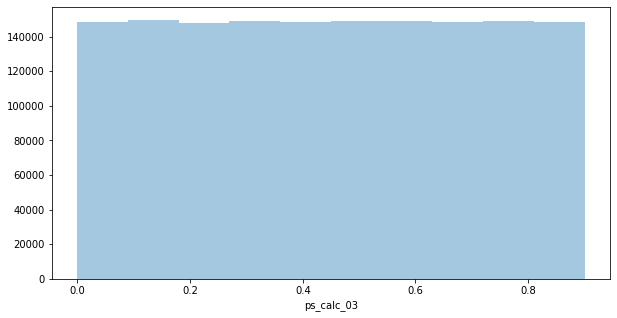

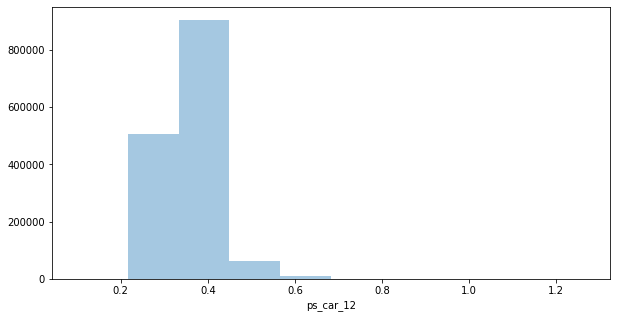

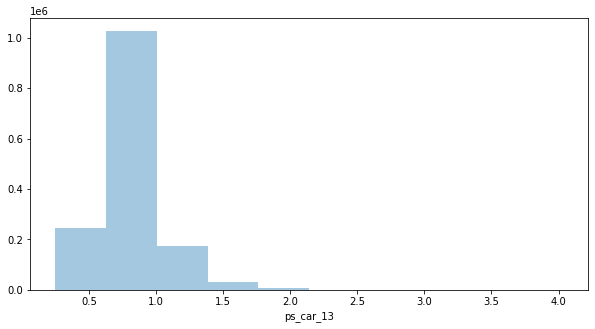

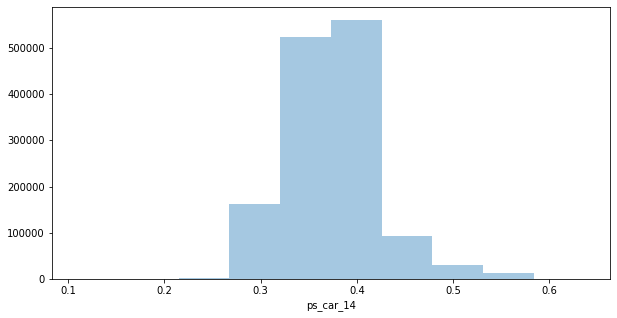

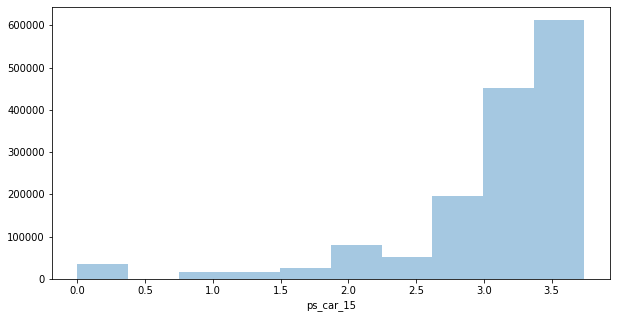

In [54]:
#4-5 변수별 히스토그램 시각화하기

# 테스트 데이터의 'target' 변수를 결측값으로 설정한다.
tst['target']= np.nan

# 훈련 데이터와 테스트 데이터를 통합한 새로운 데이터(df)를 생성한다.
df = pd.concat([trn,tst], axis = 0)

# 히스토그램 그래프 시각화를 위한 함수
def bar_plot(col, data, hue=None):
  f, ax = plt.subplots(figsize=(10,5))
  sns.countplot(x=col, hue=hue, data=data, alpha=0.5)
  plt.show()

def dist_plot(col, data):
  f, ax = plt.subplots(figsize=(10,5))
  sns.distplot(data[col].dropna(), kde=False, bins=10)
  plt.show()

# 이진 변수, 범주형 번슈 그리고 정수형 변수를 시각화 한다.
for col in binary + category + integer:
  bar_plot(col, df)

# 소수형 변수를 시각화한다.
for col in floats:
  dist_plot(col, df)

4개의 이전변수(ps_ind_16_bin,06,11,18에 대한 히스토그램을 확인해본 결과 확연한 차이가 있다. 11의 경우 0의 빈도가 압도적으로 많고 그 외 변수는 0 1의 균형이 잡혀있다.

4개의 범주형 변수(ps_car_01_cat,05,11,02)에 대한 히스토그램을 본 결과 범ㅈ형 변수의 고유값은 적게는 2개 부터 100개 이상까지 존재한다.

4개의 정수형 변수(ps_calc_06,07,01,03)에서 06과 07은 정규분포와 같은 분포를 보인다. 그외는 한쪽으로 쏠려있는 분포를 보이고 있다.

4개의 소수형 변수(ps_calc_01,02,reg_01,02)에서 두변수(cal_01,02)는 균등 분포를 보이고 있다.

익명 변수들이 그룹화 되어있기 때문에 군집별 분석을 수행할수있다.

### 변수 간 상관관계

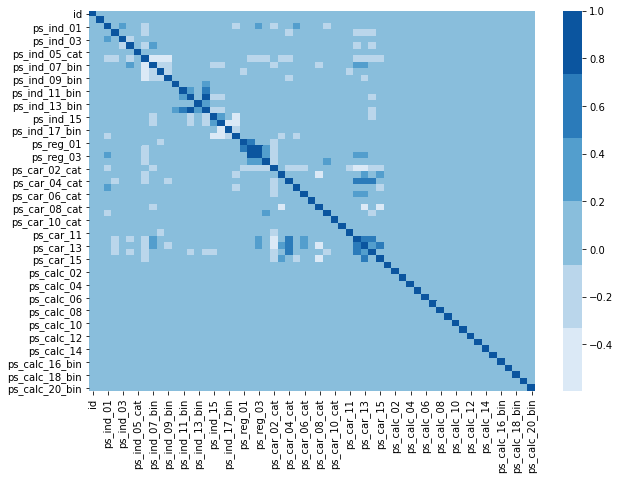

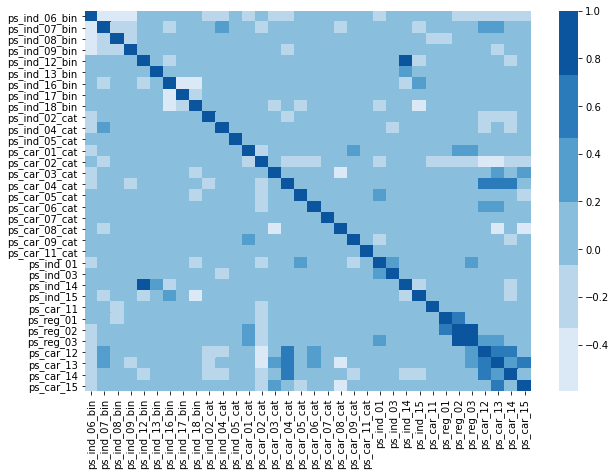

In [55]:
# 4-6 변수간 상관관계 HeatMap을 시각화하는 코드

# 전체 데이터에 대한 상관관계 HeatMap 시각화
corr = df.corr()
cmap = sns.color_palette("Blues")
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(corr, cmap=cmap)

# 일부 변수만 선별
features = ['ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 
          'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin',
          'ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 
          'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 
          'ps_car_11_cat', 'ps_ind_01', 'ps_ind_03', 'ps_ind_14', 'ps_ind_15', 'ps_car_11',
          'ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_12', 'ps_car_13',
          'ps_car_14', 'ps_car_15']

corr_sub = df[features].corr()
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(corr_sub, cmap=cmap)

대부분의 변수들이 상관관계가 매우 낮음을 확인할 수 있다. 일부 변수를 선별하여 상관관계 HeatMap 그래프를 그려본 결과 ps_ind_14와 ps_ind_12_bin 두 변수가 0.89의 높은 상관관계를 보유하고 있는 것을 확인할 수 있다.

### 단일변수 vs 타겟변수

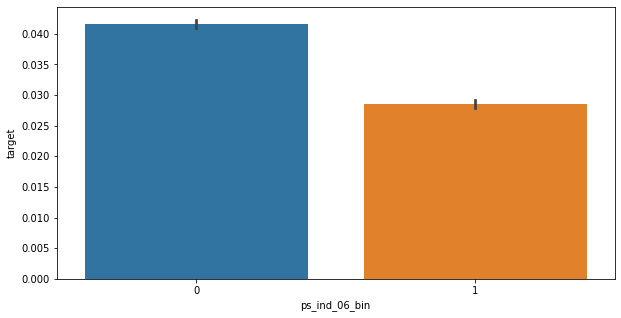

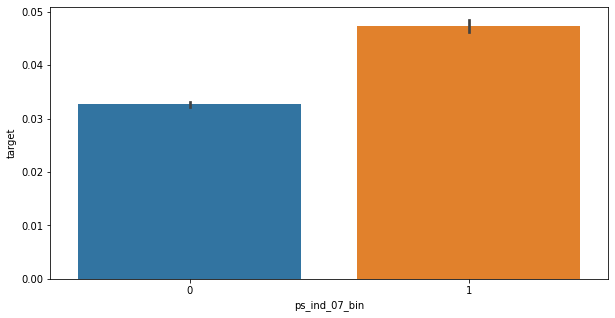

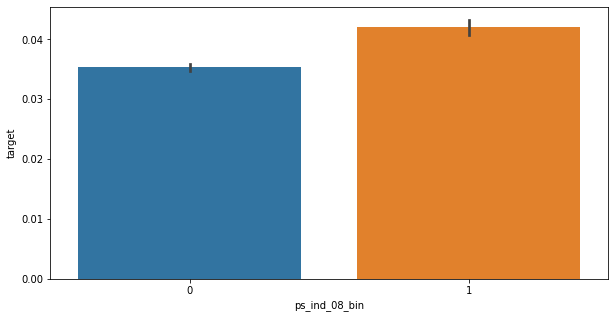

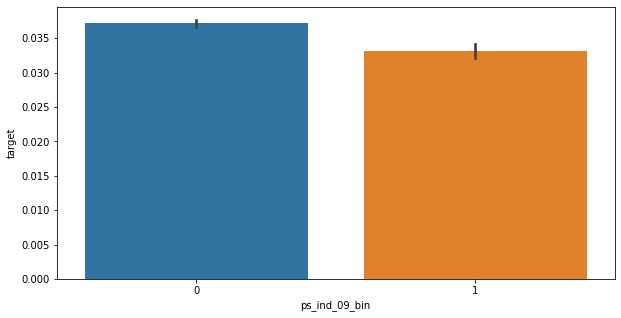

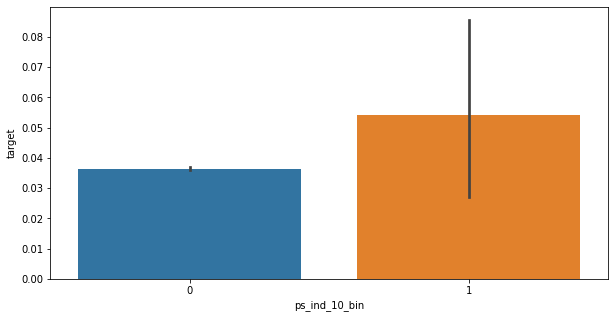

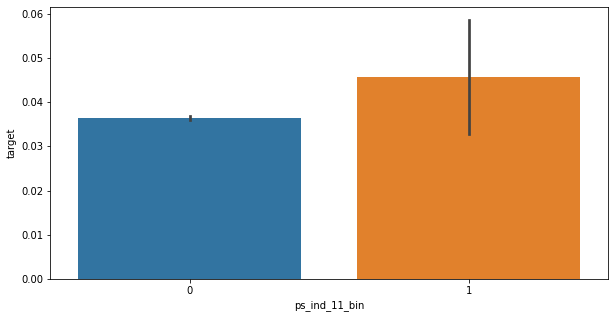

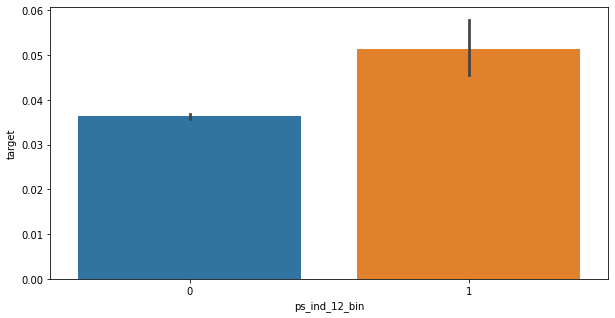

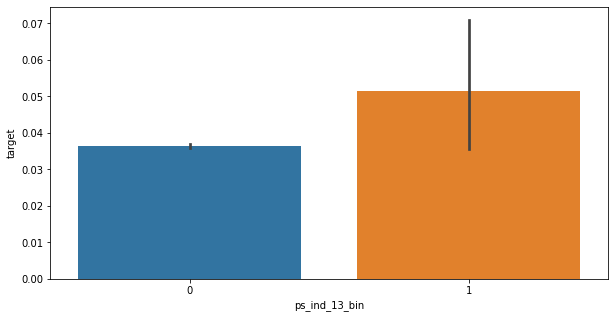

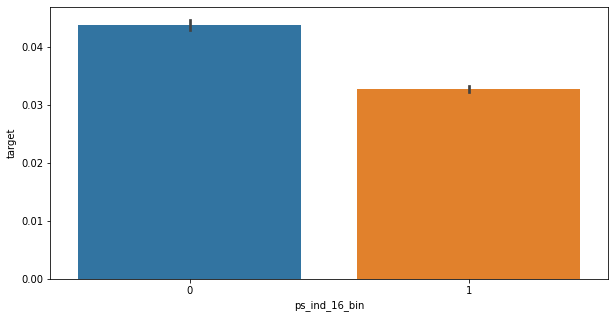

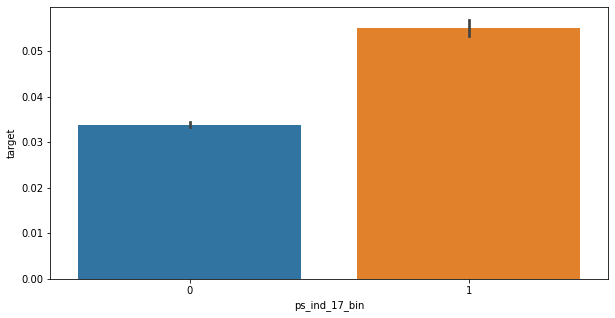

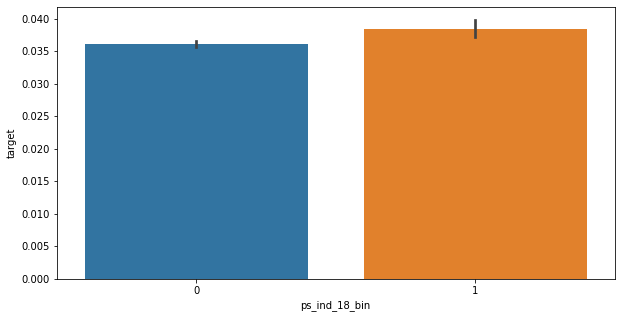

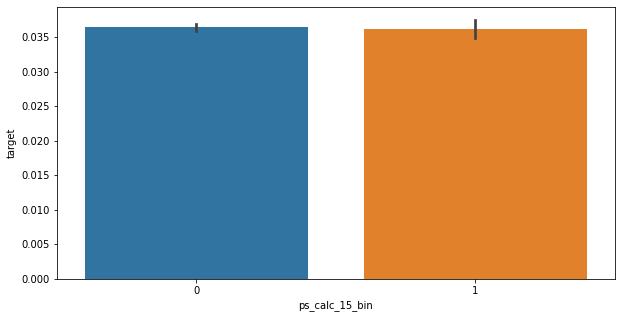

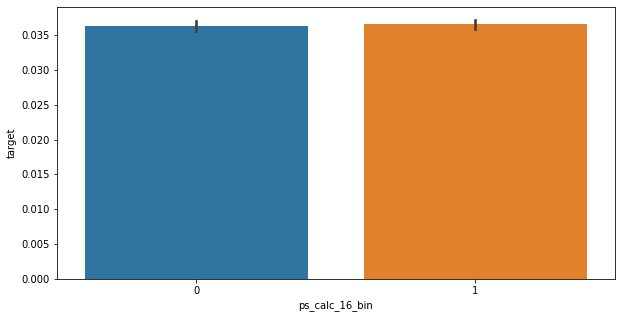

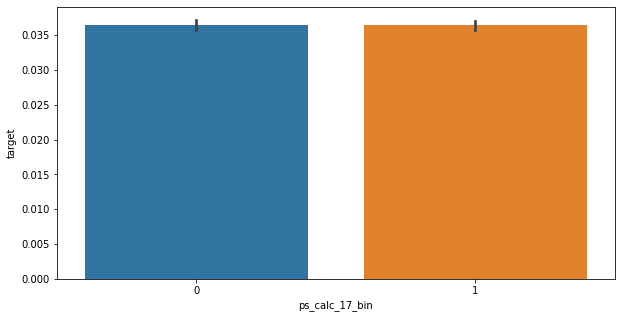

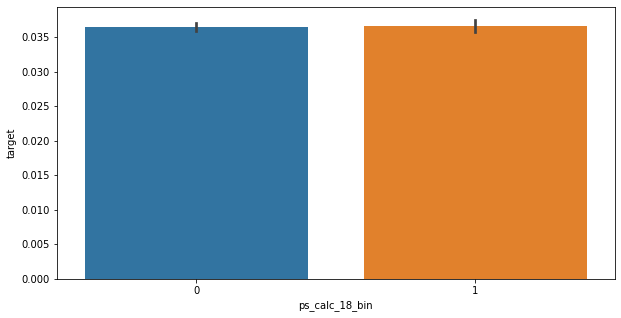

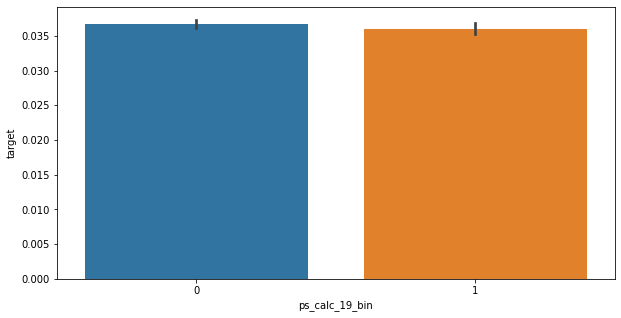

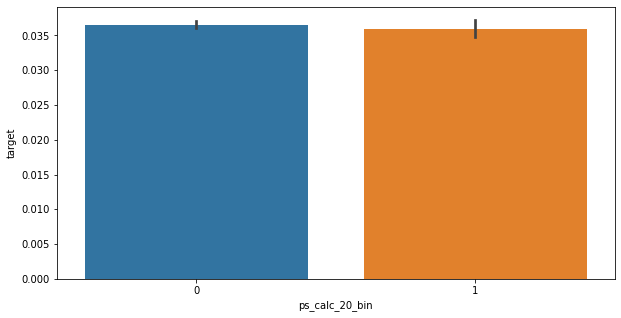

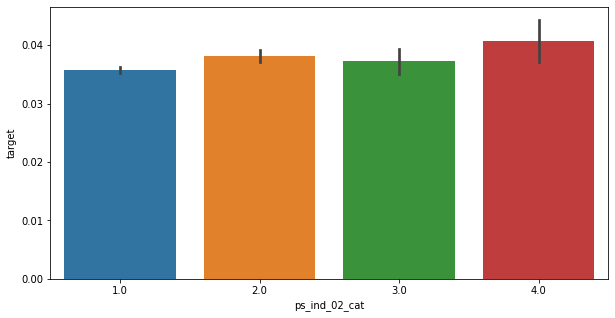

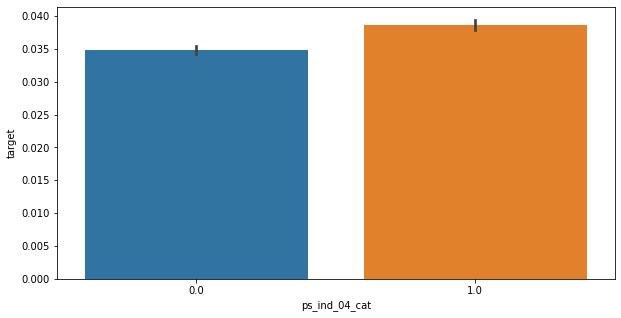

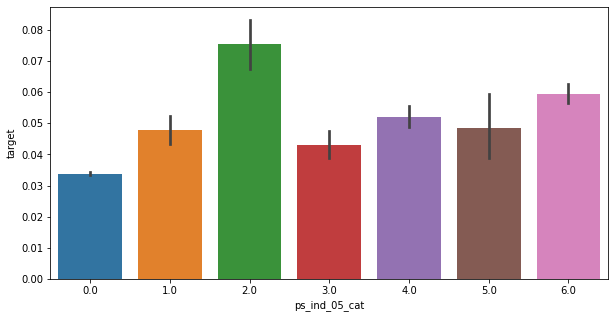

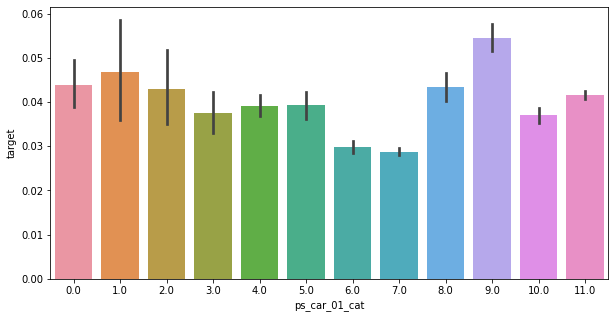

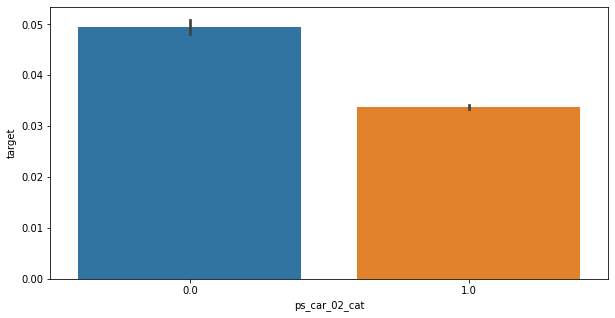

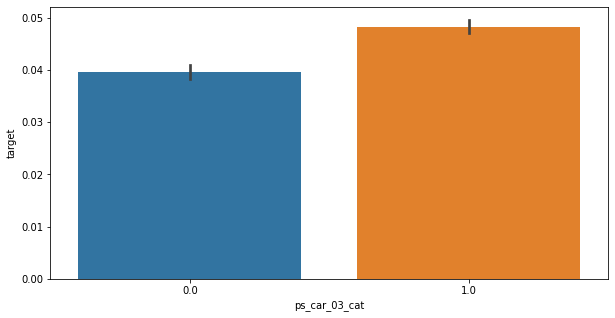

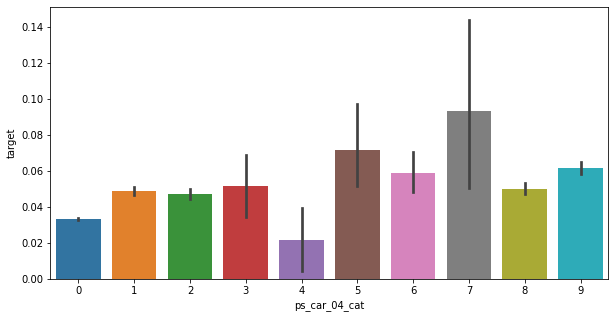

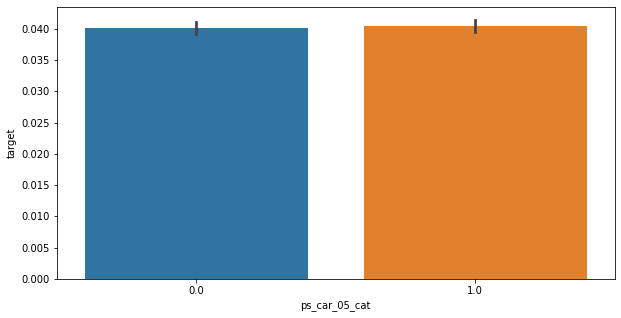

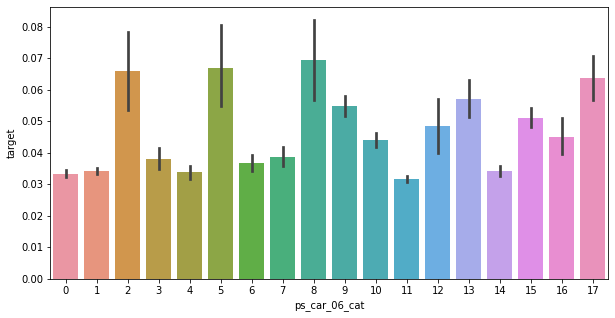

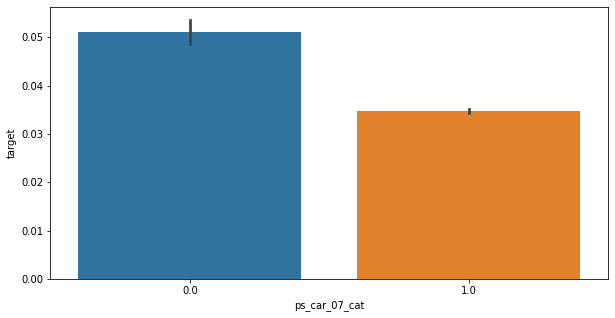

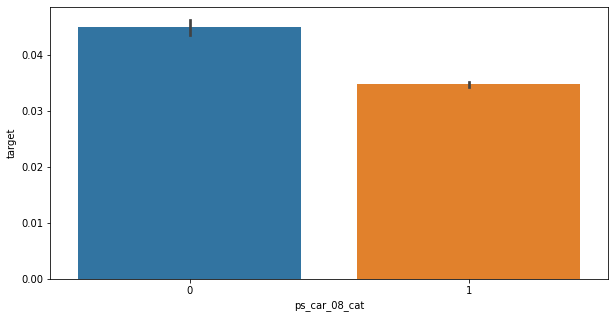

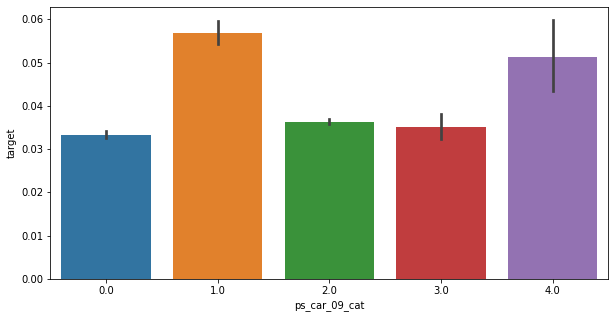

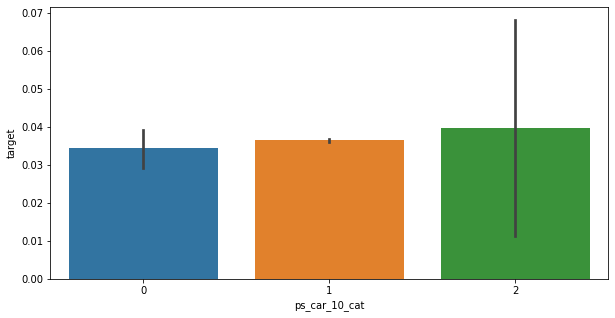

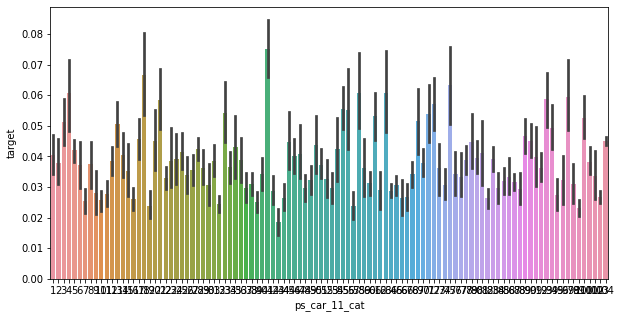

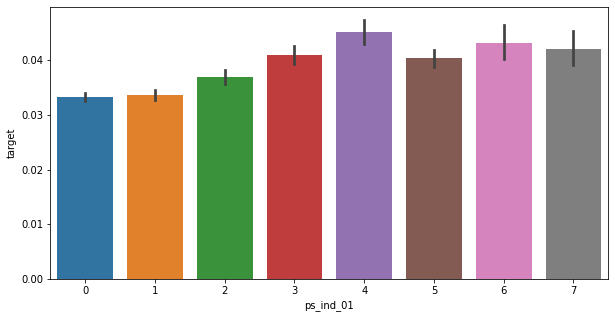

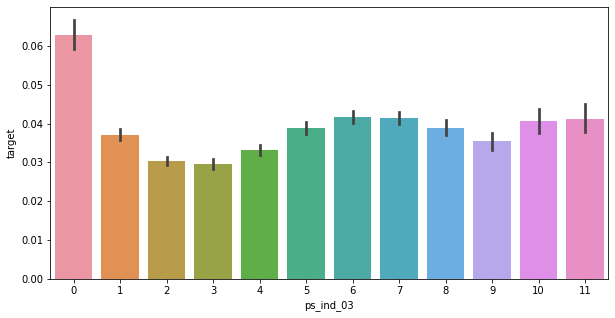

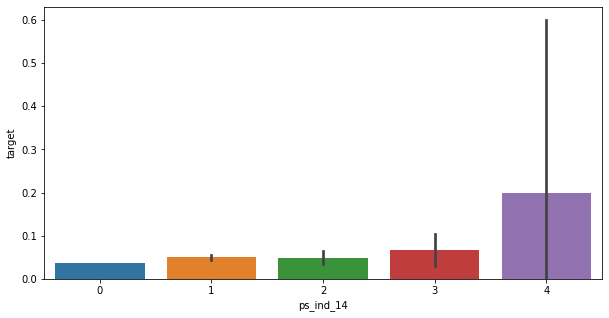

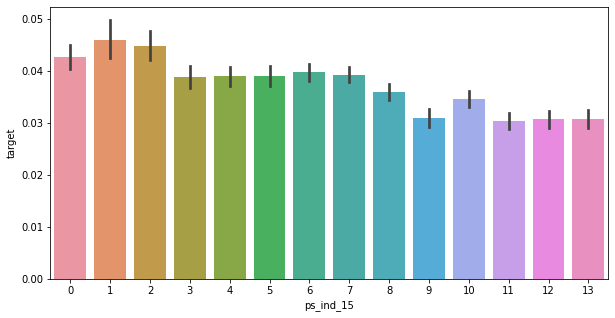

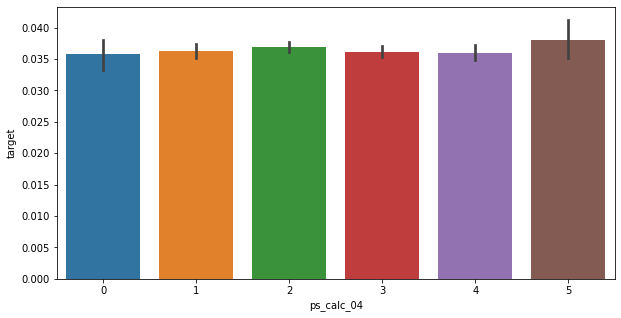

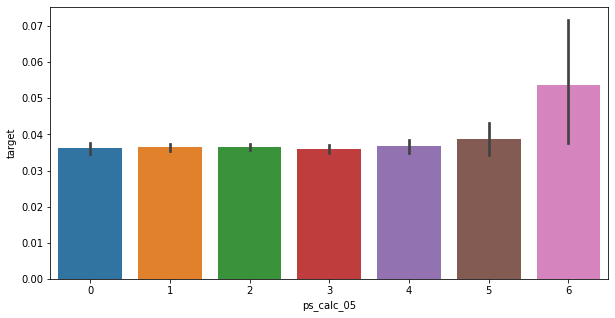

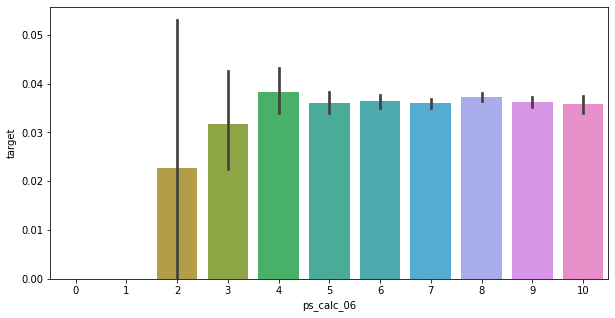

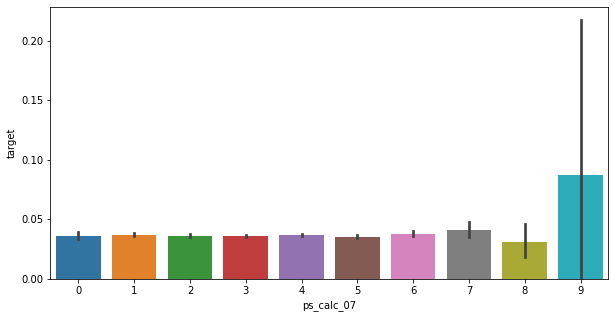

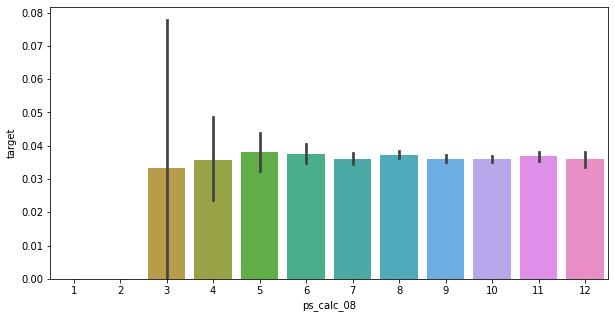

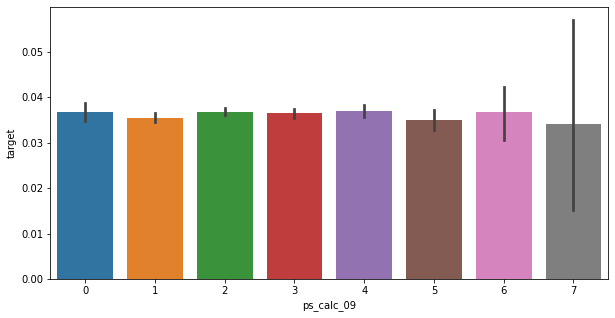

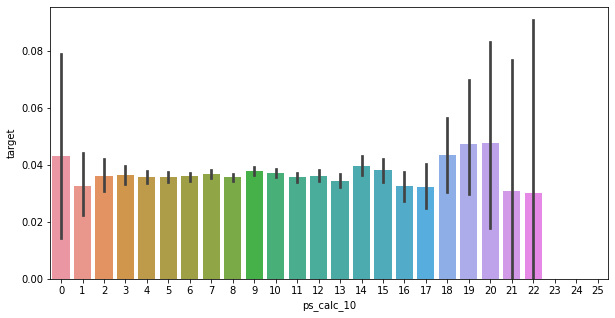

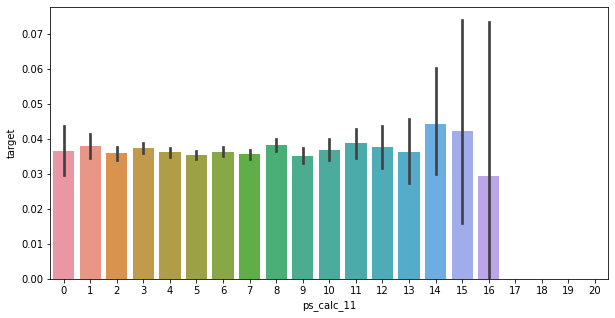

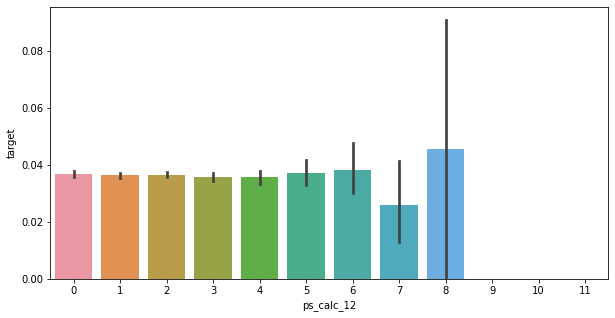

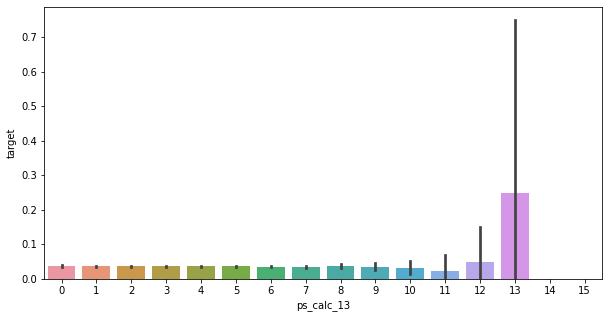

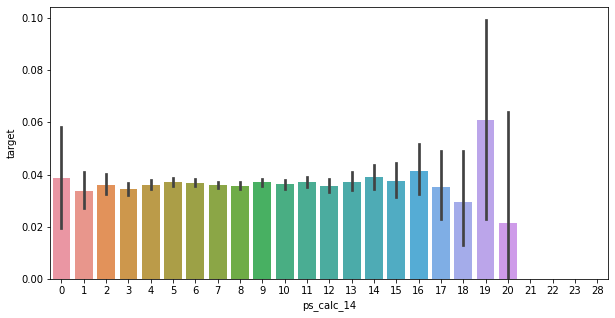

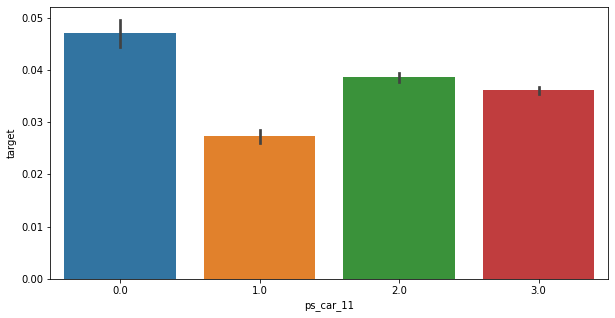

In [56]:
# 4-7 변수의 고유값별 타겟 변수에 대한 비율을 시각화하는 코드

#단일 변수 vs 타겟 변수 시각화를 위한 함수
def bar_plot_ci(col, data):
  f, ax = plt.subplots(figsize =(10,5))
  sns.barplot(x=col, y='target', data=data)
  plt.show()

# 이진 변수 , 범주형 변수 그리고 정수형 변수를 시각화한다.
for col in binary +category + integer:
  bar_plot_ci(col, df)

전체 데이터 기준 타겟 변수의 비율은 3.6%이다. 막대그래프 중간에 그려진 검정 직선은 95% 신뢰 구간을 의미한다.



*   ps_ind_16_bin, 06 두 변수는 이진 변수의 값에 따라 카겟 변수의 비율이 다르다. 통계적 유효성을 충분히 지닌 두 변수는 모델링 관점에서 유용한 변수라고 할 수 있다. 
*   ps_ind_11_bin은 평균값 기준으로는 타겟 변수의 비율이 유의미하게 달라 보이지만 통계적 유효성이 없다. 

*   ps_calc_18_bin은 평균 타겟 비율에서 큰 차이를 찾기 어려우며, 변수로써의 예측 능력이 낮음을 의미한다.






*   ps_car_01_cat 변수는 단순 히스토그럼 분포와 달리 7.0과 11.0에서 타겟 비율이 상대적으로 낮은 편이다. 1.0, 2.0 등의 타겟 비율의 95% 신뢰 구간이 넓어 변수로써의 예측 능력이 좋진 않지만, 최소한 6.0, 7.0과는 통계적으로 유의미한 차이를 보인다.
*   ps_car_11_cat의 경우, 104개의 고유값이 0.02~0.08의 큰범위의 타겟 비율ㅇㄹ 보인다. 해당변수도 어느정도 예측력을 가진것으로 보인다.




*   ps_calc_06, ps_calc_07 두 변수는 특정 값에서의 타겟 비율의 95% 신뢰구간이 너무 광범위해서 변수로써 예측 능력이 많이 떨어진다.
*   ps_ind_01, ps_ind_03 두 변수는 고유값별로 95% 신뢰 구ㅏㄴ이 군집화 되넌것으로보아, 어느정도 예측 능력을 보유하고 있다.



### 훈련 데이터 vs 테스트 데이터 비교

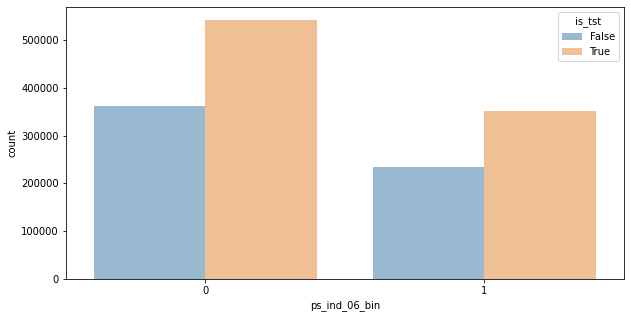

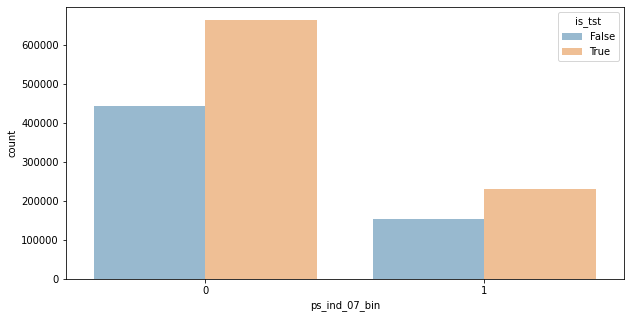

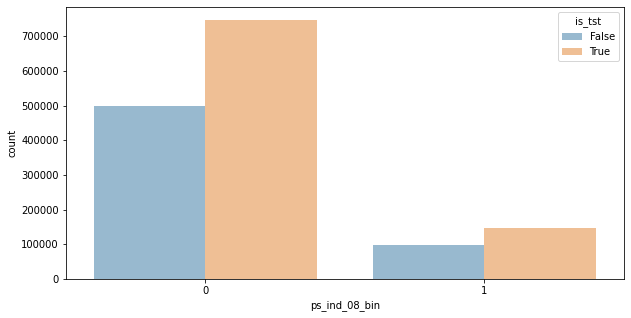

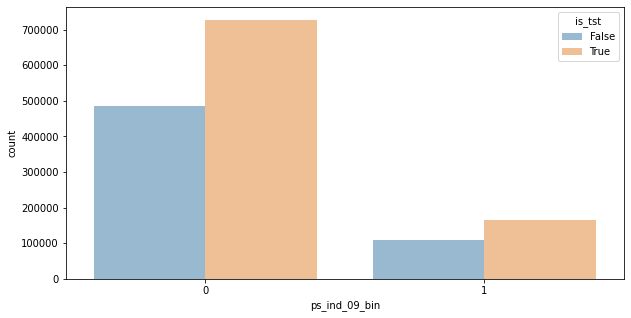

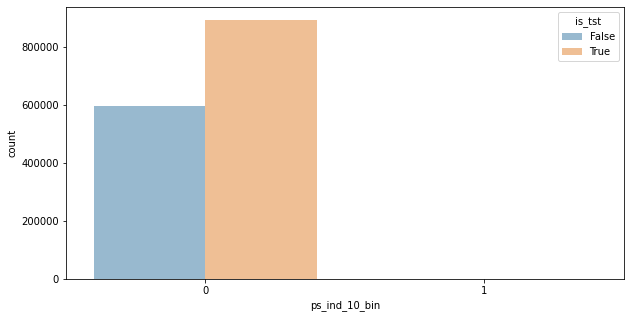

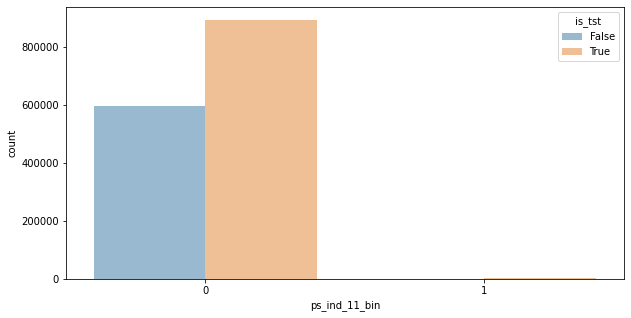

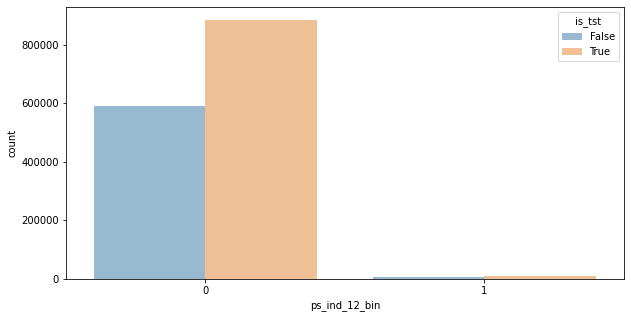

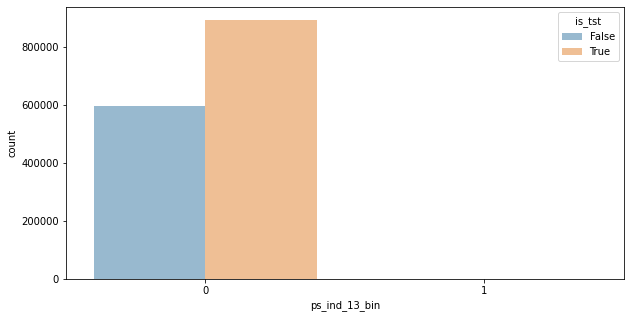

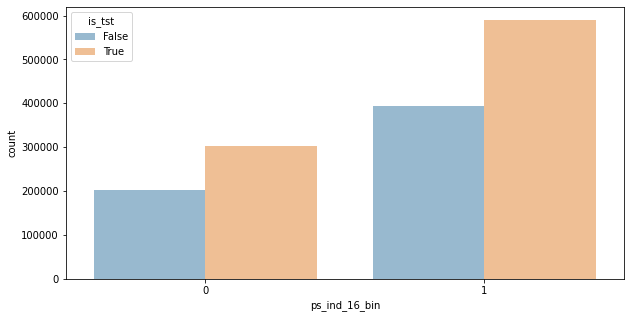

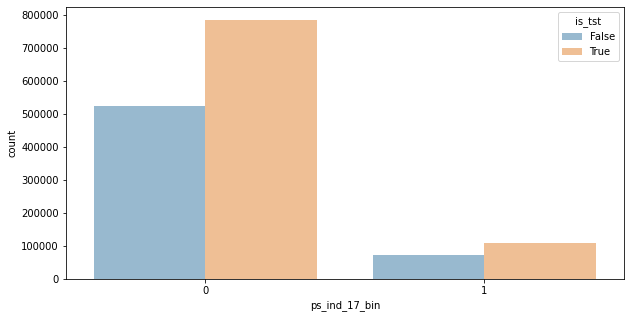

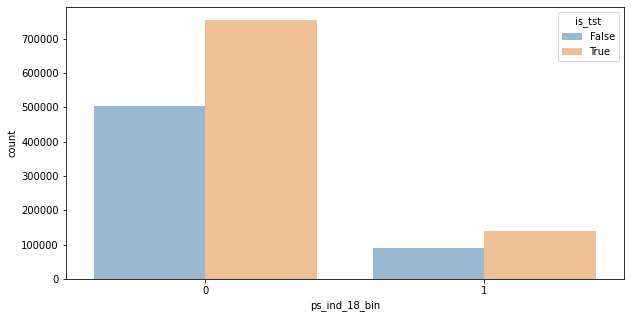

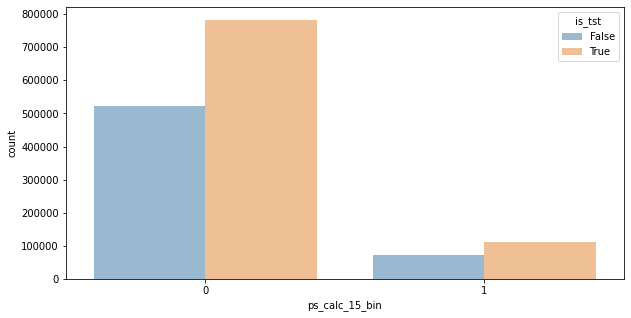

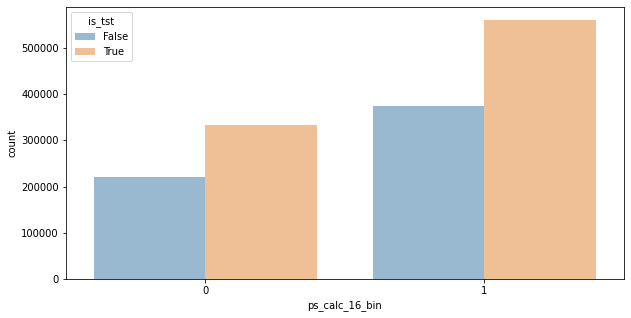

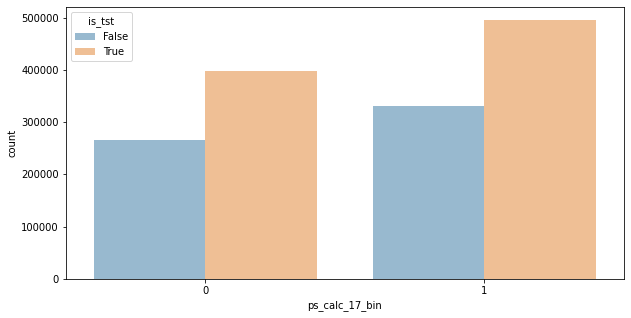

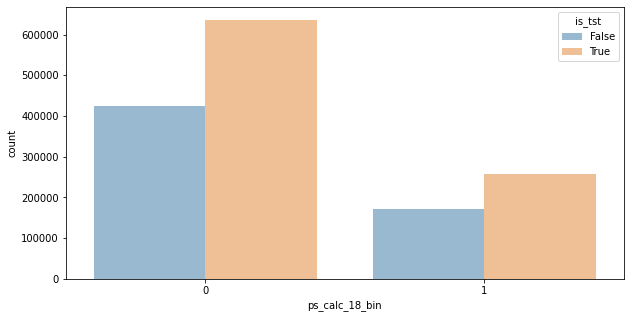

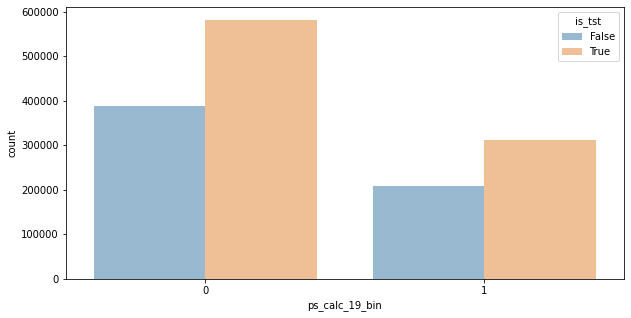

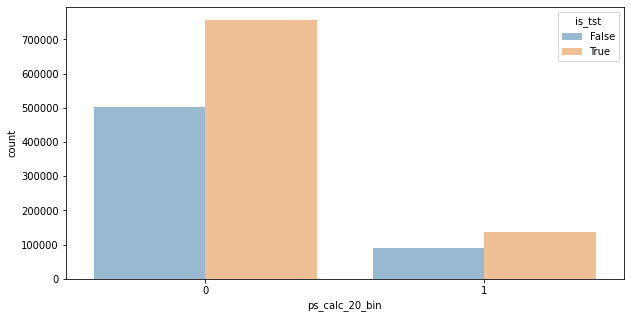

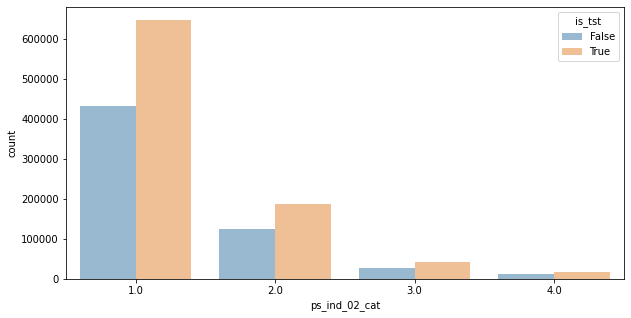

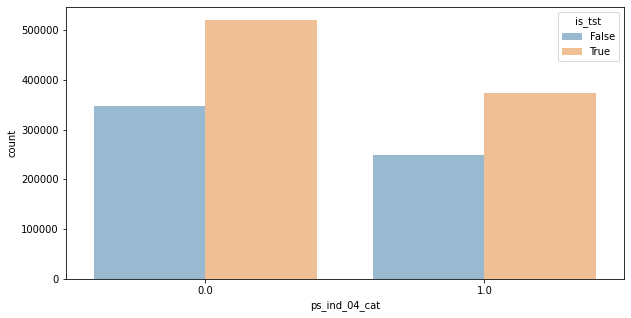

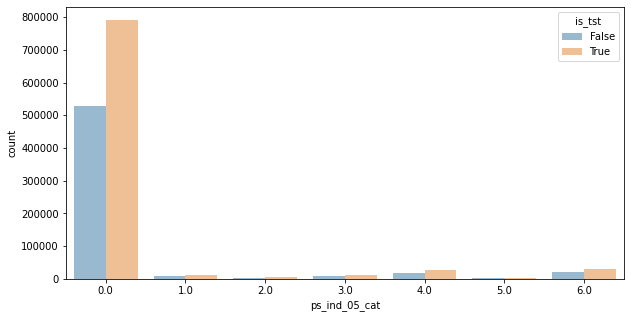

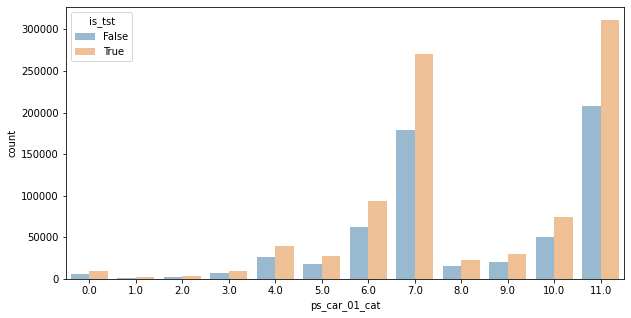

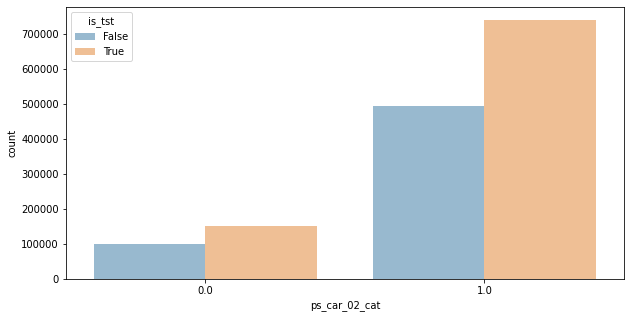

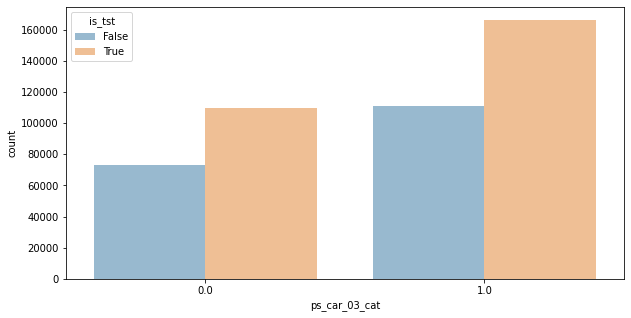

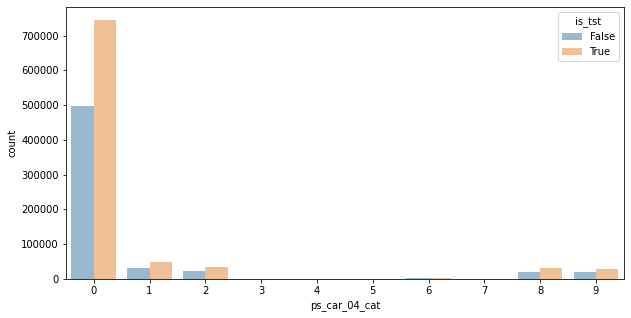

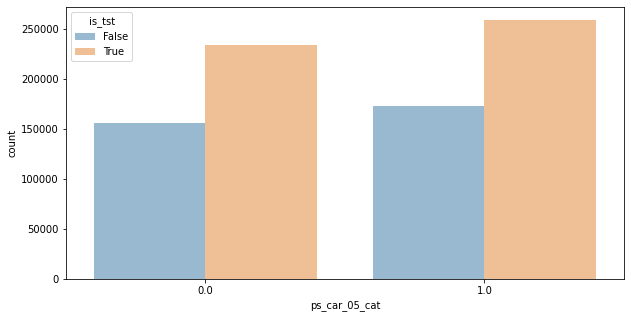

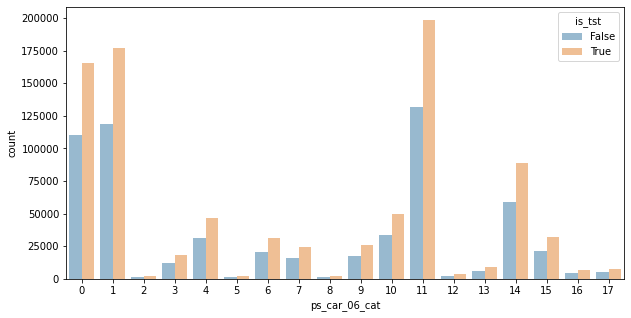

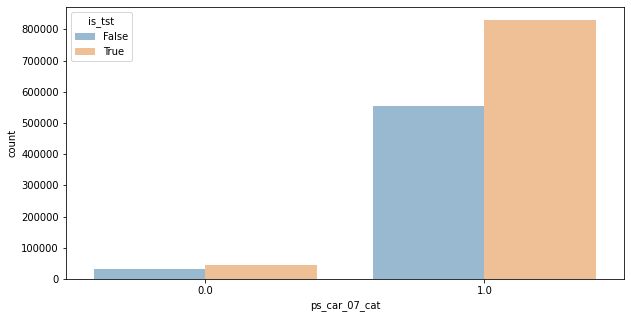

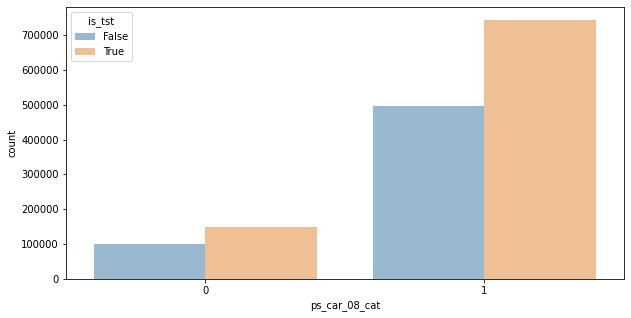

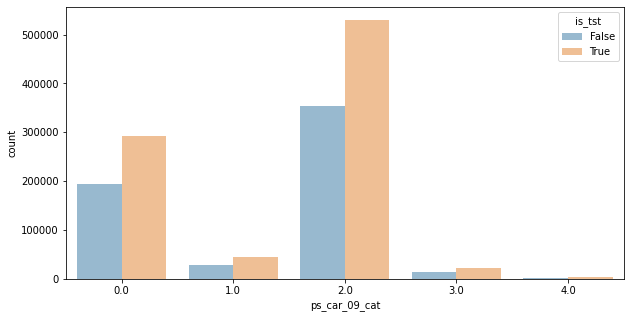

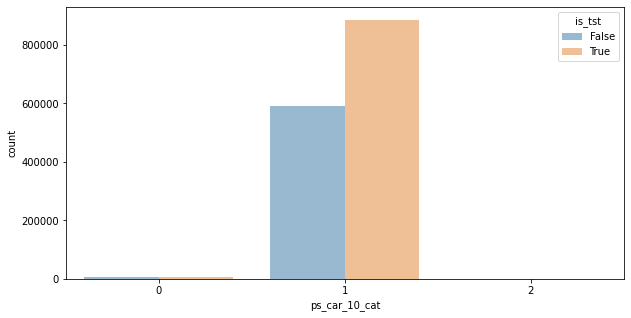

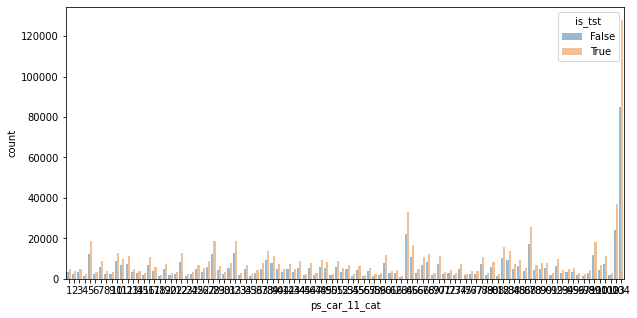

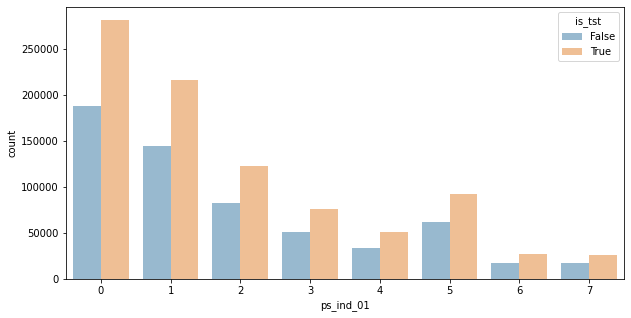

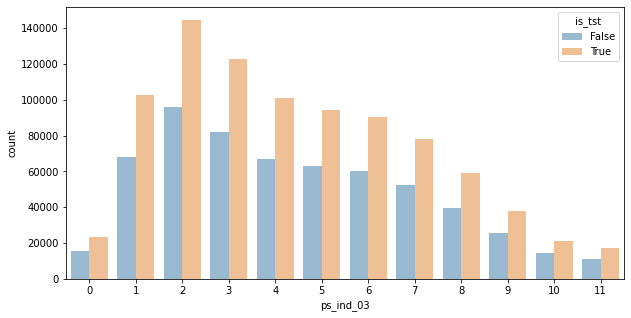

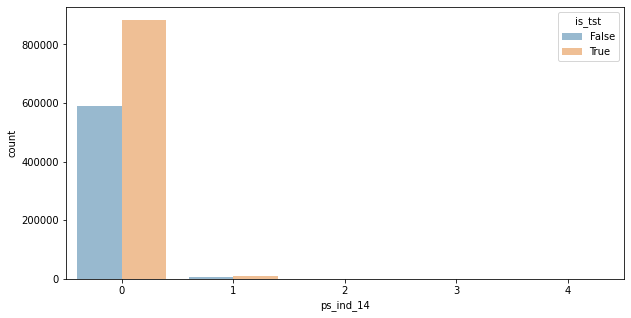

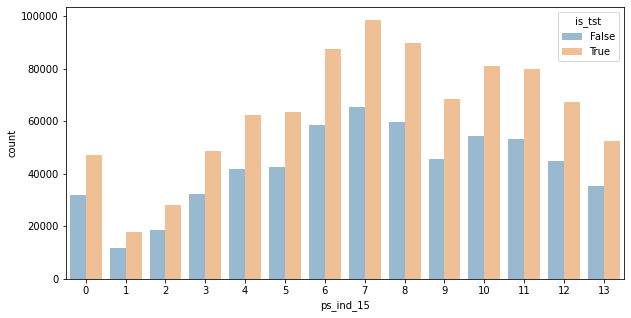

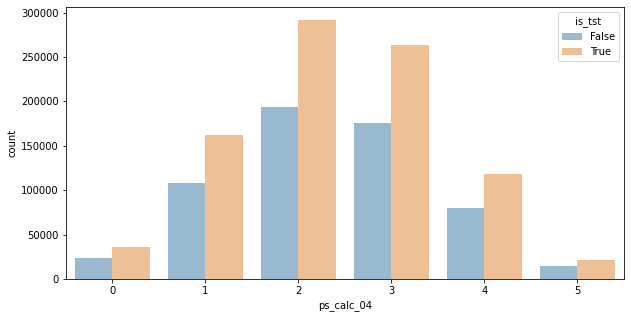

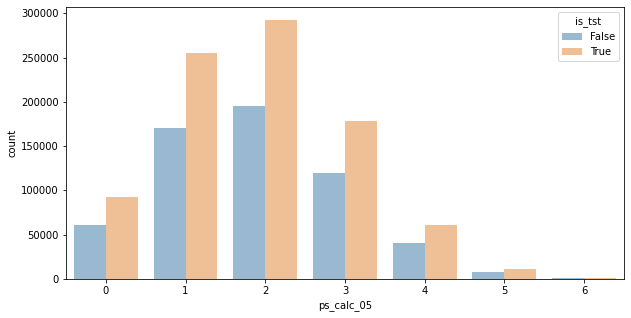

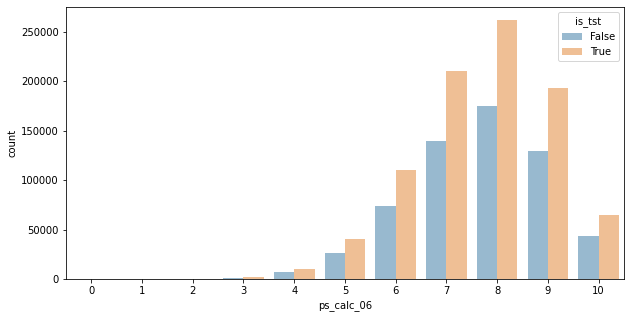

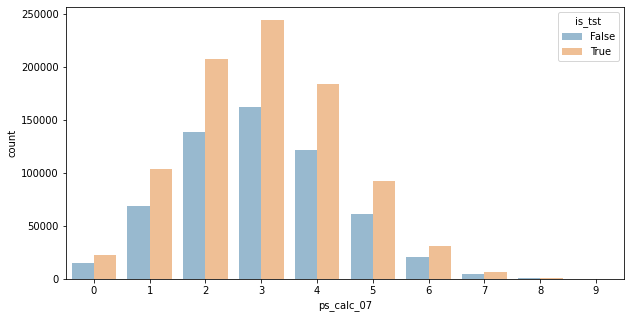

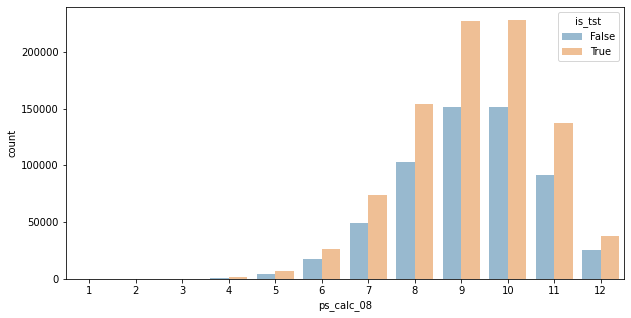

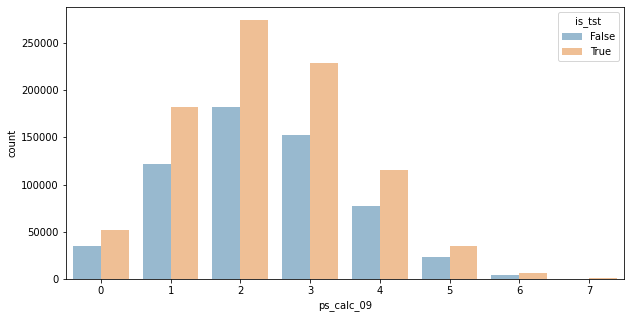

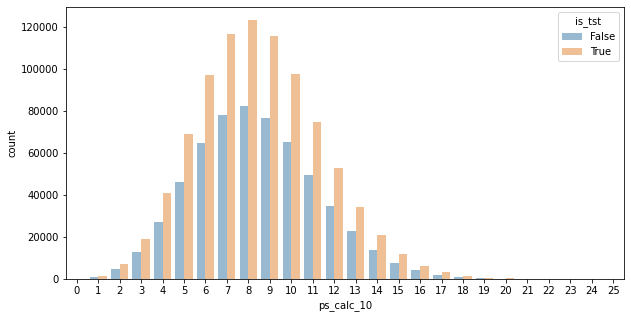

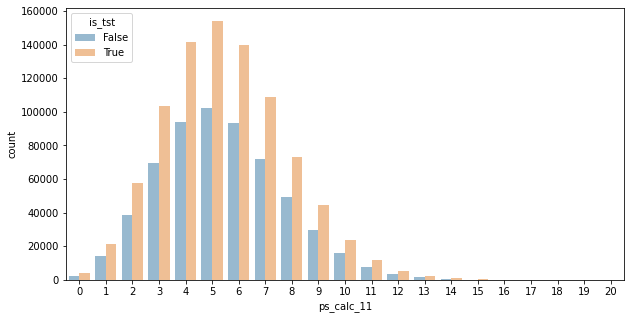

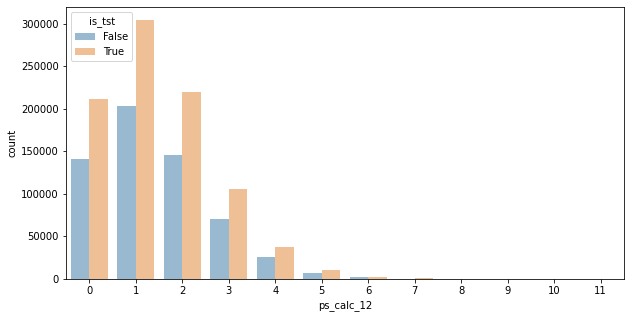

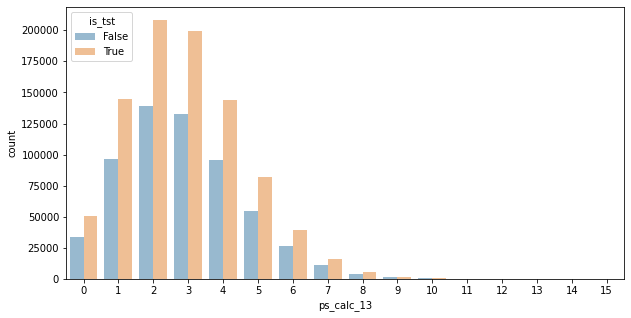

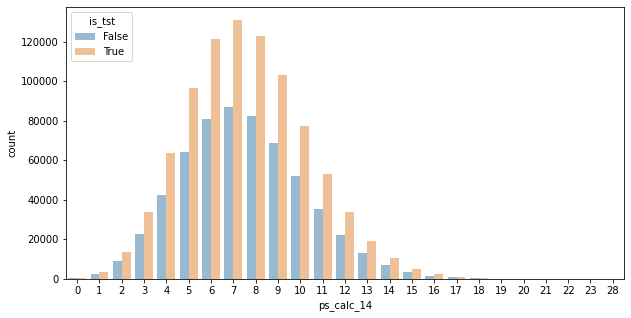

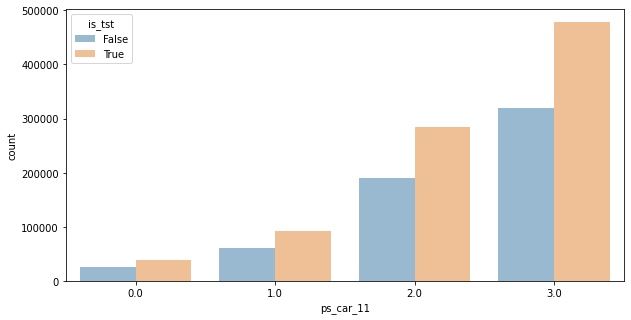

In [57]:
# 4-8 훈련 데이터와 테스트 데이터의 분포를 비교하는 코드

df['is_tst'] = df['target'].isnull()

# 이진 변수, 범주형 변수 그리고 변수를 시각화한다.
for col in binary + category + integer:
  bar_plot(col, df, 'is_tst')

모든 변수에 대하여 테스트 데이터의 빈도가 훈련 데이터보다 1.5배 가량 높은 값을 가지고 있다.

## 4.7 Baseline 모델

### 1) 데이터 전처리

In [58]:
# 4-9 훈련 데이터와 테스트 데이터를 읽어와 id와 target을 분리

import pandas as pd

# 훈련/테스트 데이터를 읽어온다
train = pd.read_csv('/content/train.csv/train.csv')
train_label = train['target']
train_id = train['id']
del train['target'], train['id']

test = pd.read_csv('/content/test.csv/test.csv')
test_id = test['id']
del test['id']

### 2) 피처 엔지니어링



1.   결측값의 개수를 나타내는 missing 변수

1.   이진 변수들의 총합
2.   Target Encoding 파생변수



In [59]:
# 4-10 파생 변수를 생성하는 코드 : 파생 변수 03은 교차 검증 과정에서 수행한다.

#파생 변수 01: 결측값을 의미하는 '-1'의 개수를 센다
train['missing'] = (train == -1).sum(axis=1).astype(float)
test['missing'] = (test == -1).sum(axis=1).astype(float)

# 파생 변수 02 : 이진 변수의 합
bin_features = [c for c in train.columns if 'bin' in c]
train['bin_sum'] = train[bin_features].sum(axis=1)
test['bin_sum'] = test[bin_features].sum(axis=1)

# 파생 변수 03 : 단일변수 타겟 비율 분석으로 선정한 변수를 기반으로 Target Encoding을 수행한다. 
#Target Encoding은 교차 검증 과정에서 진행한다.
features = ['ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_12_bin', 
            'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_ind_04_cat', 'ps_ind_05_cat', 
            'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_06_cat',
            'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_11_cat', 'ps_ind_01', 
            'ps_ind_03', 'ps_ind_15', 'ps_car_11']

파생 변수는 운전자 데이터별 결측값의 개수를 더한 값이다. 결측값의 개수가 데이터 내에 새로운 군집 정보를 제공한다고 생각한다. 숙련 운전자는 소랜 기간동안 많은 정보가 쌓인 반면 초보 운전자들의 정보는 적을 수 있다. 데이터의 출처에 대한 정보를 제공 할수도 있다.

이진변수의 합은 변수간의 상호 작용으로 얻을수있는 고차원 정보를 추출한다.

데이터 탐색 분석 과정에서 선별한 일부 변수를 대상으로 Target Encoding을 수행한다.

### 3) LightGBM 모델 정의

In [70]:
# 4-11 LightGBM 모델의 설정값

# LightGBM 모델의 설정값이다.
import lightgbm as lgbm
num_boost_round = 10000
params = {"objective": "binary",
          "boosting_type": "gbdt",
          "learning_rate": 0.1,
          "num_leaves": 15,
          "max_bin": 256,
          "feature_fraction": 0.6,
          "verbosity": 0,
          "drop_rate": 0.1,
          "is_unbalance": False,
          "max_drop": 50,
          "min_child_samples": 10,
          "min_child_weight": 150,
          "min_split_gain": 0,
          "subsample": 0.9,
          "seed": 2018
}

### 4) 모델 학습 및 교차 검증 평가

In [73]:
# 4-12 교차 검증 과정을 통해 검증 데이터에 대한 평가 점수와 테스트 데이터에 대한 최종 예측값을 계산하여 저장하기

#Stratified 5-Fold 내부 교차 검증을 준비한다
from sklearn.model_selection import StratifiedKFold

NFOLDS = 5
kfold = StratifiedKFold(n_splits = NFOLDS, shuffle = True, random_state=218)
kf = kfold.split(train, train_label)

cv_train = np.zeros(len(train_label))
cv_pred = np.zeros(len(test_id))
best_trees = []
fold_scores = []

for i, (train_fold, validate) in enumerate(kf):
  # 훈련/검증 데이터를 분리한다
  X_train, X_validate, label_train, label_validate = train.iloc[train_fold, :], train.iloc[validate, :], train_label[train_fold], train_label[validate]
  # target encoding 피처 엔지니어링을 수행한다.
  for feature in features:
    # 훈련 데이터에서 feature 고유값별 타겟 변수의 평균을 구한다
    map_dic = pd.DataFrame([X_train[feature], label_train]).T.groupby(feature).agg('mean')
    map_dic = map_dic.to_dict()['target']
    # 훈련/검증/테스트 데이터에 평균값을 매핑한다,
    X_train[feature + '_target_enc'] = X_train[feature].apply(lambda x : map_dic.get(x,0))
    X_validate[feature +'_target_enc'] = X_validate[feature].apply(lambda x : map_dic.get(x,0))

  dtrain = lgbm.Dataset(X_train, label_train)
  dvalid = lgbm.Dataset(X_validate, label_validate, reference=dtrain)
  # 훈련 데이터를 학습시키고, evalerror()함수를 통해 검증 데이터에 대한 정규화 Gini계수 점수를 기준으로 트리 개수를 찾는다.
  bst = lgbm.train(params, dtrain, num_boost_round, valid_sets=dvalid, feval=evalerror, 
                   verbose_eval=100, early_stopping_rounds=100)
  best_trees.append(bst.best_iteration)
  # 테스트 데이터에 대한 예측값을 cv_pred에 더한다.
  cv_pred += bst.predict(test, num_iteration=bst.best_iteration)
  cv_train[validate] += bst.predict(X_validate)

  # 검증 데이터에 대한 평가 점수를 출력한다.
  score = Gini(label_validate, cv_train[validate])
  print(score)
  fold_scores.append(score)

cv_pred /= NFOLDS

# 시드값별로 교차 검증 점수를 출력한다.
print("cv score:")
print(Gini(train_label, cv_train))
print(fold_scores)
print(best_trees, np.mean(best_trees))

# 테스트 데이터에 대한 결과물을 저장한다.
pd.DataFrame({'id': test_id, 'target': cv_pred}).to_csv('/content/lgbm_baseline.csv', index=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


NameError: ignored